<a href="https://colab.research.google.com/github/Faheemfemu/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

* The dataset contained about 7787 records, and 11 attributes.

* We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

* Creating cluster using following attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

* We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

* We built Two types of clusters using the K-Means Clustering and Agglomerative Heirachycal clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.

* A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [66]:
# Import Libraries
import pandas as pd # Data manpulation
import numpy as np # handling matrices
from datetime import datetime as dt # Handling datetime
from scipy.stats import * # statistics analysis
import math # importing mathematics module

# Visulization 
import matplotlib.pyplot as plt #matplot 
import missingno as msno #visulization for missing values
%matplotlib  inline
import seaborn as sns # Visulization 
sns.set()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from wordcloud import WordCloud, STOPWORDS

# Handling warnings
import warnings
warnings.filterwarnings('ignore')
import os
import re
from sklearn.preprocessing import RobustScaler #Handling Outliers
# extracting the stopwords from nltk library and some nlp libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp
import string
import unicodedata
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

# importing sklearn algorithms to predict the output from the model
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer
     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [2]:
# Load Dataset
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4 Machine Learning/Capstone Project - Unsupervised Machine Learning/ NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

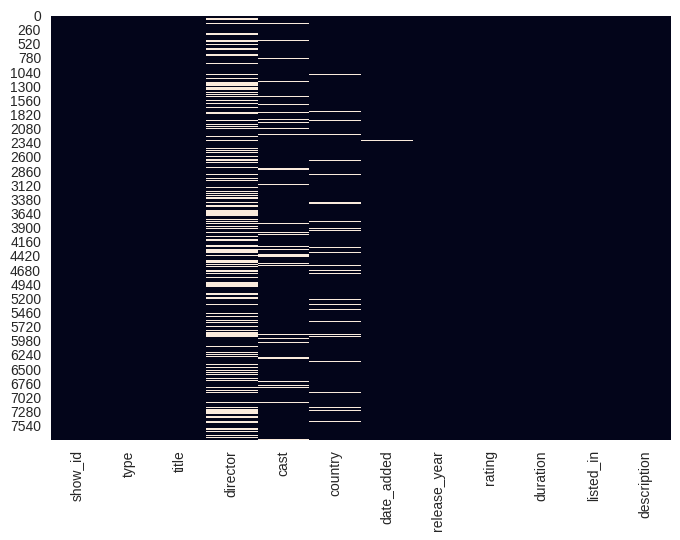

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(),cbar=False);

### What did you know about your dataset?

Answer Here

* Dataset has total of 7787 Raw and 12 columns.
* Dataset is a mixture of integer and object data type.


* The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
* 10 records with missing values in the date_added column can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

Answer Here
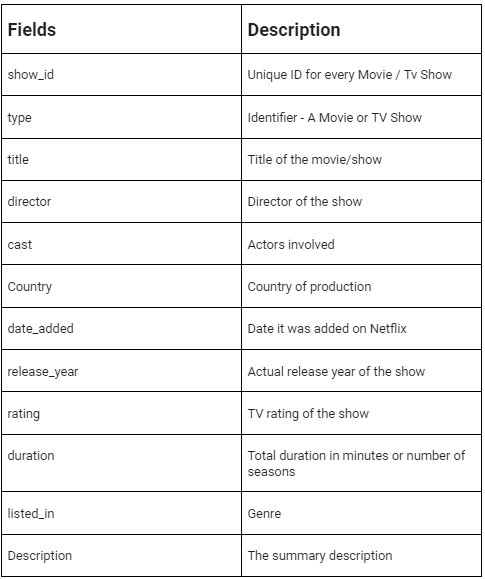

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns:
  print("No. of unique values in '{}' is {}.".format(i, df[i].nunique()))
     

No. of unique values in 'show_id' is 7787.
No. of unique values in 'type' is 2.
No. of unique values in 'title' is 7787.
No. of unique values in 'director' is 4049.
No. of unique values in 'cast' is 6831.
No. of unique values in 'country' is 681.
No. of unique values in 'date_added' is 1565.
No. of unique values in 'release_year' is 73.
No. of unique values in 'rating' is 14.
No. of unique values in 'duration' is 216.
No. of unique values in 'listed_in' is 492.
No. of unique values in 'description' is 7769.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
df['type'].value_counts()



Movie      5377
TV Show    2410
Name: type, dtype: int64

In [13]:
df['director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: director, dtype: int64

In [14]:
# Top Countries
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [15]:
# Genre of shows
df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [16]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].astype(str)
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])
     

In [17]:
#Number of movies/shows from country
df['country'].value_counts()

United States     2883
India              956
United Kingdom     577
nan                507
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [18]:
#Type of shows 
df['listed_in'].value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
T

In [19]:
#Typecasting duration from string to integer
df['duration']=df['duration'].apply(lambda x:int(x.split()[0]))

In [20]:
df.duration.dtype

dtype('int64')

In [21]:
#Typecasting date_added from string to date and time
df['date_added']=pd.to_datetime(df['date_added'])

In [22]:
#can see the starting and ending of movies added date
df.date_added.min(), df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [23]:
#Creating new attributes month and year referrence from date_added
df['month']=df['date_added'].dt.month
df['year']=df['date_added'].dt.year
df.drop('date_added', axis=1,inplace=True)

In [24]:
#Changing ratings into age restrictions
sns.countplot(x = 'rating', data=df)
     

<Axes: xlabel='rating', ylabel='count'>

In [25]:
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [26]:
#changing rating values 
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['rating'].replace(ratings,inplace = True)
df['rating'].unique()
     

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

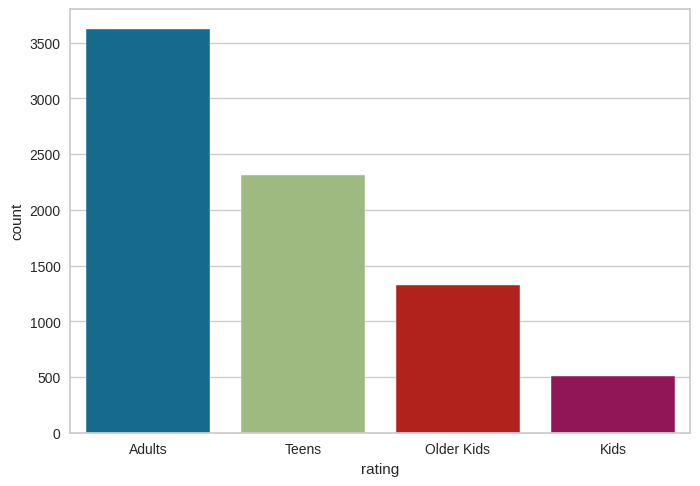

In [27]:
sns.countplot(x='rating', data=df)

### What all manipulations have you done and insights you found?

Answer Here.

* there is two type of Tv shows and movie
* Listed out top 10 country's i.e., the country holding maximun number of TV shows and movies.
* Listed out top 10 director's.
* Duration period has changed string to integer.
* dated has been changed string into datetime.
* Datetime has splited into more number of features like day, month and year.
* More number of ratings segregated.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 pie & count

In [28]:
# Chart - 1 visualization code
fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot 
graph = sns.countplot(x = 'type', data = df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()
     

##### 1. Why did you pick the specific chart?



To Know the Percentage of Movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

* Movies has more number of counts than TV Shows.
* 31% of the data are from TV shows, while 69% of the data are from movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Handling both TV Shows and Movies is an challenging task for an netflix

#### Chart - 2 Directors Analysis

In [29]:
# Chart - 2 visualization code
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df['director'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors')

Text(0.5, 1.0, 'Top 10 directors')

##### 1. Why did you pick the specific chart?

Answer Here.
We will see the top 10 directors in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

Rahul Campos and Jan Suter both together directed 18 movies/TV shows.

#### Chart - 3  Country analysis

Text(0.5, 1.0, ' Top 10 countries')

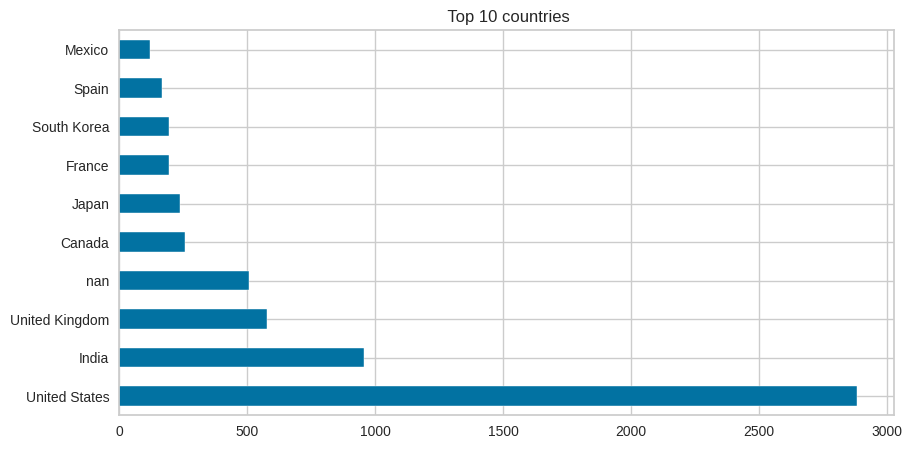

In [30]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='barh')
plt.title(' Top 10 countries')

##### 1. Why did you pick the specific chart?

Answer Here.

As analysis the plot will know the top ten countries in the dataset which have more movies/TV shows.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

AS we see the bar plots the United States have more number of TV shows and movies and followed by India, United Kingdom.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Needs to improve and analysis on the other countries.

#### Chart - 4 Releas year

In [31]:
# Chart - 4 visualization code
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Distribution of this graph giving the information anbout in which year movies/TV shows released.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.
* Netflix starts releasing more Movies/TV shows in recent years compared to old ones.
* Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

As comparing the releasing year data in dataset after 2018 its slowly decreasing the number of TV shows/movies.

#### Chart - 5  Month analysis

In [32]:
# Chart - 5 visualization code
plt.figure(figsize = (10,5)) 
sns.countplot(x='month',data=df)

plt.title('Shows added each month')
plt.xlabel('')

Text(0.5, 0, '')

##### 1. Why did you pick the specific chart?

Answer Here.

Monthly analysis as per given dataset

##### 2. What is/are the insight(s) found from the chart?

Answer Here

October, November, December and January months have the peak time which contains more data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Will understand the data which month having more data as well as least data in other months.

#### Chart - 6

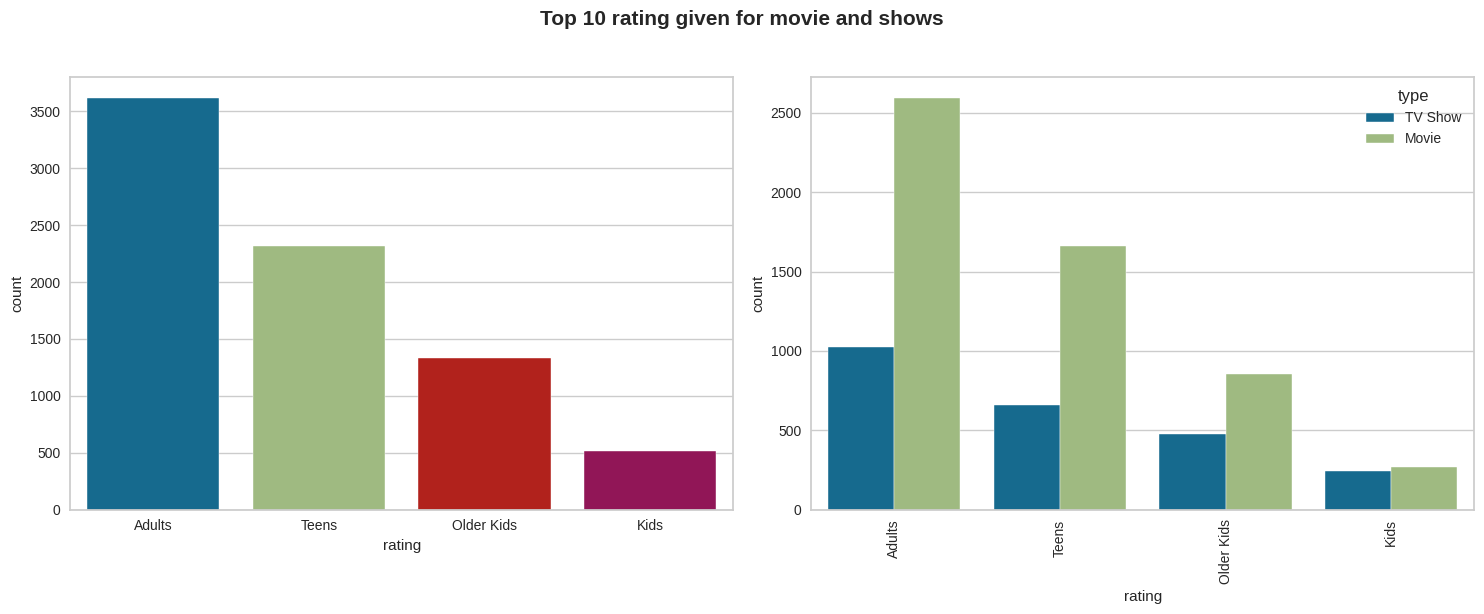

In [33]:
# Chart - 6 visualization code
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
for rating analysis

##### 2. What is/are the insight(s) found from the chart?

Answer Here.
* The majority of Movies and TV shows have a rating of Adults, followed by Teens.
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

#### Chart - 7 Number of Seasons Analysis

In [34]:
# Chart - 7 visualization code
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10))

##### 1. Why did you pick the specific chart?

Answer Here.4

Gives the information about which show have the more seasons.


##### 2. What is/are the insight(s) found from the chart?

Answer Here.

The TV series in the dataset have up to 16 seasons, however the bulk of them only have one.

#### Chart - 8  Duration Distribution Analysis

Text(0.5, 1.0, 'Movie duration distribution')

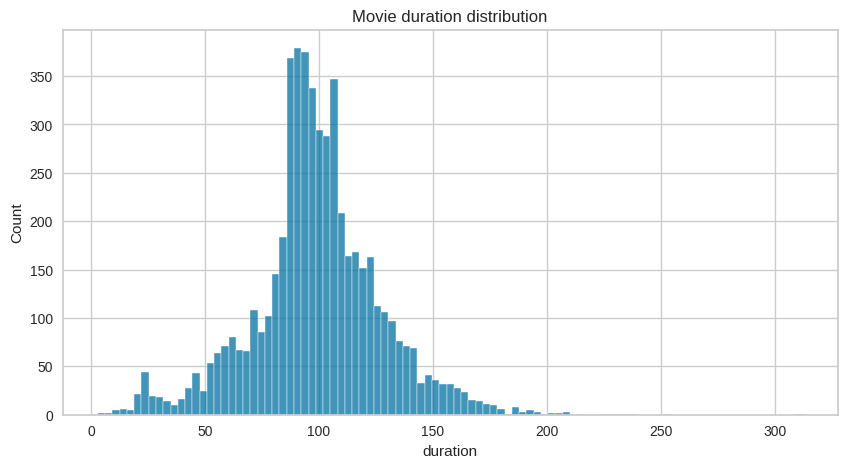

In [35]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

##### 1. Why did you pick the specific chart?

Answer Here.

Length of movie analysis.

##### 2. What is/are the insight(s) found from the chart?

In [36]:
df[df['type']=='Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

Answer Here.

The minimum duration of 3 minutes and maximum is 312 minutes.


#### Chart - 9 Type of Movies analysis

In [37]:
# Chart - 9 visualization code
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().head(10).plot(kind='barh')
plt.title('Top 10 genres for movies')


Text(0.5, 1.0, 'Top 10 genres for movies')

##### 1. Why did you pick the specific chart?

Answer Here.

In movies which type of Genre having the more data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

Dramas, comedy and documentry have more movies.

#### Chart - 10  Type of TV Shows

Text(0.5, 1.0, 'Top 10 genres for movies')

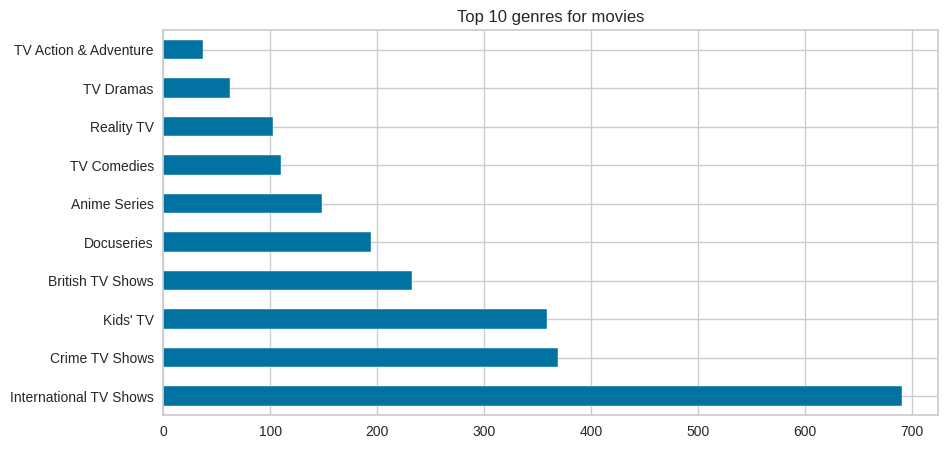

In [38]:
# Chart - 10 visualization code
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().head(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

##### 1. Why did you pick the specific chart?

Answer Here.

As we know the more type of data in Genre we can see in the tv shows.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

International TV Shows, Kids TV, Crime TV Show have the more popular.

#### Chart - 11  Movie Length

In [39]:
# Chart - 11 visualization code
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='hist')
plt.title('Average movie length')
plt.ylabel('Movie length (minutes)')
plt.xlabel('Year')
     

Text(0.5, 0, 'Year')

##### 1. Why did you pick the specific chart?

Answer Here.

Average movie length in a year.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

After 2000 year netflix movies have been continuosly decerasing.

#### Chart - 12 WordCloud

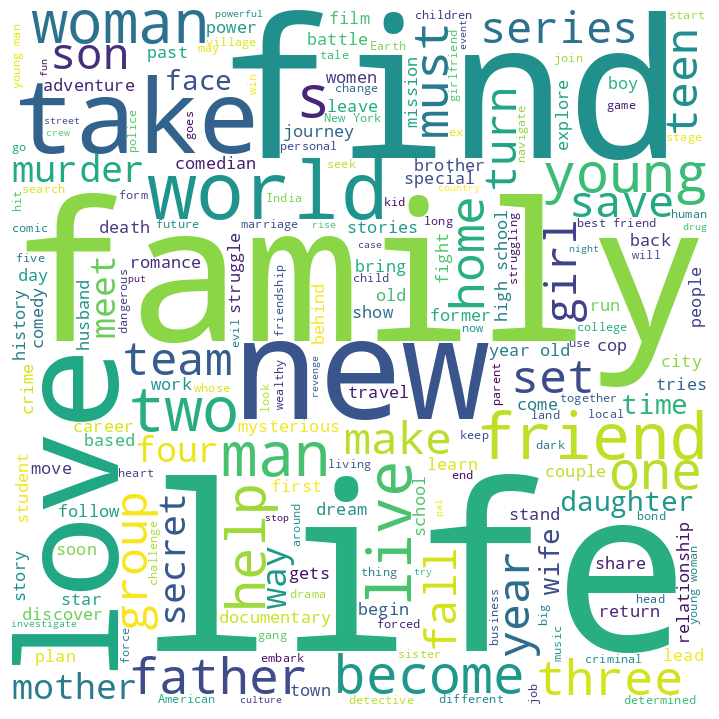

In [40]:
# Chart - 12 visualization code
comment_words = ''
stopwords = set(STOPWORDS)

for term in df.description.values:
    
    # typecaste each val to string
    term = str(term)

    # split the value
    tokens = term.split()  
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (14,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


##### 1. Why did you pick the specific chart?

Answer Here.

plotting the some key words which contains from the Netflix data

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

Type of keywords from Netflix dataset like: family,life, friend, find, love, woman, young, man, love etc

#### Chart - 14 - Correlation Heatmap

<Axes: >

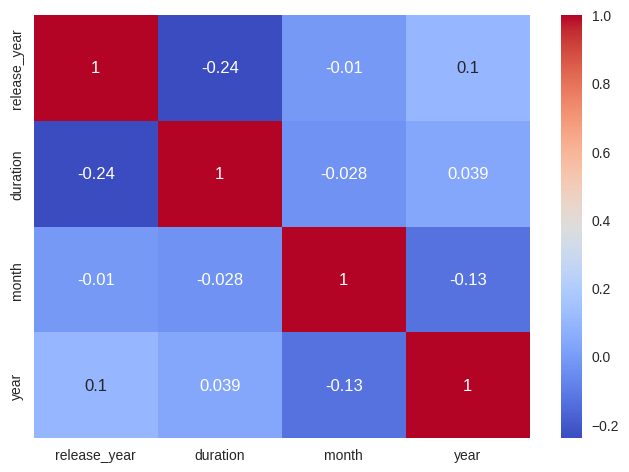

In [41]:
# Correlation Heatmap visualization code
corr_matrix=df.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap="coolwarm",annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.

Calculate correlation between each pair of variable

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Here the correlation range -0.2 to 1.0. Whenever its corelating with self column we will get the higher corelation.duration and year having slightly correlating

#### Chart - 15 - Pair Plot 

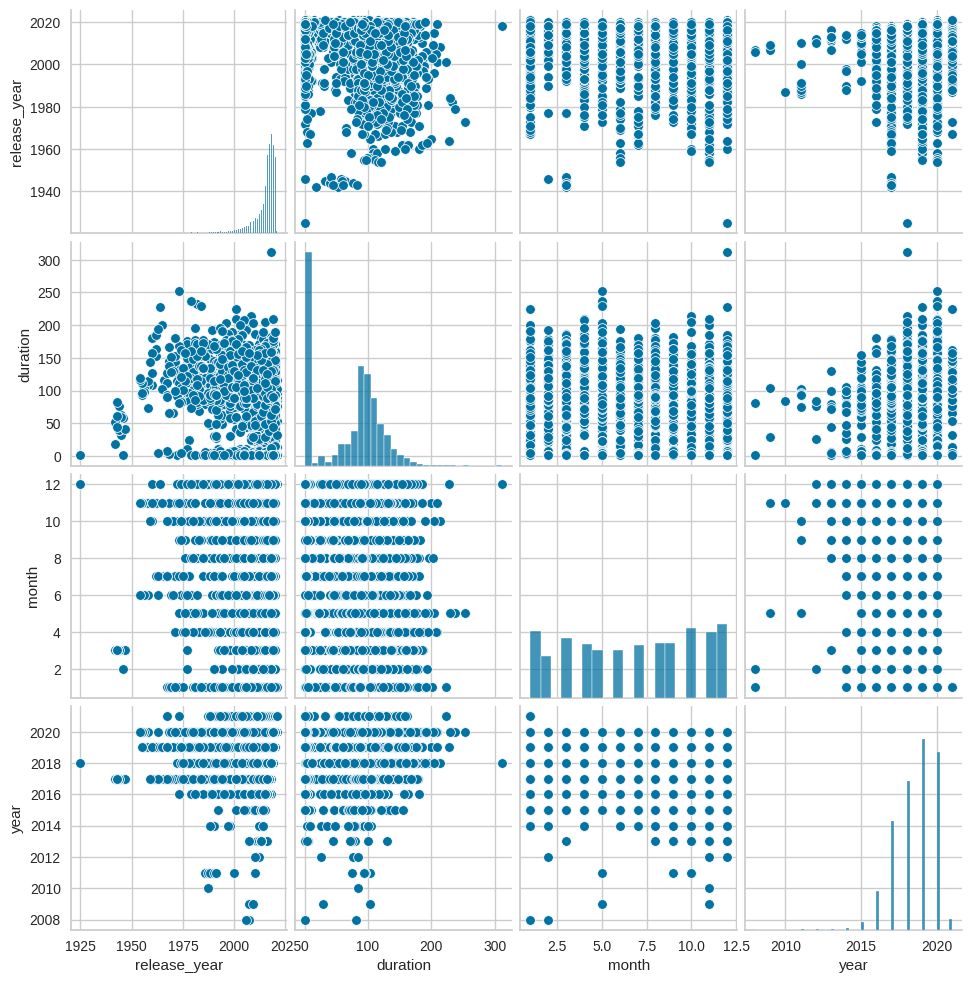

In [42]:
# Pair Plot visualization code
sns.pairplot(df)
     

##### 1. Why did you pick the specific chart?

Answer Here.

Pair plot Analysis: Gives the dataset distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

The pair plot taken features as follows: release_year, duration, month, year.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Is 90 minutes the mean length of a movie on Netflix?
2. Number of Adults have the movies collection is 100 in the given dataset?
3. Overall Netflix released number of movies and TV shows 500?

Answer Here.


In [43]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()
     

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Is 90 minutes the mean length of a movie on Netflix?

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
hypothesis_1=df["duration"]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 90
sample_mean = hypothesis_1.mean()
size = len(hypothesis_1)
std=(variance(hypothesis_1))**0.5

In [45]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypothesis_1,col="Duration")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.3799134922373904e-286


##### Which statistical test have you done to obtain P-Value?

Answer Here.

z-test is used to do statistical test which gives the p-value

##### Why did you choose the specific statistical test?

In [46]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypothesis_1)
sns.distplot(hypothesis_1)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)

plt.show()

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Number of Adults have the movies collection is 100 in the given dataset?

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
hypothesis_2=df[(df['rating'])=='Adults'].value_counts()
# Getting the required parameter values for hypothesis testing
hypothesis_number = 100
sample_mean = hypothesis_1.mean()
size = len(hypothesis_2)
std=(variance(hypothesis_2))**0.5

In [48]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypothesis_2,col="Duration")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

z-test is used to do statistical test which gives the p-value

##### Why did you choose the specific statistical test?

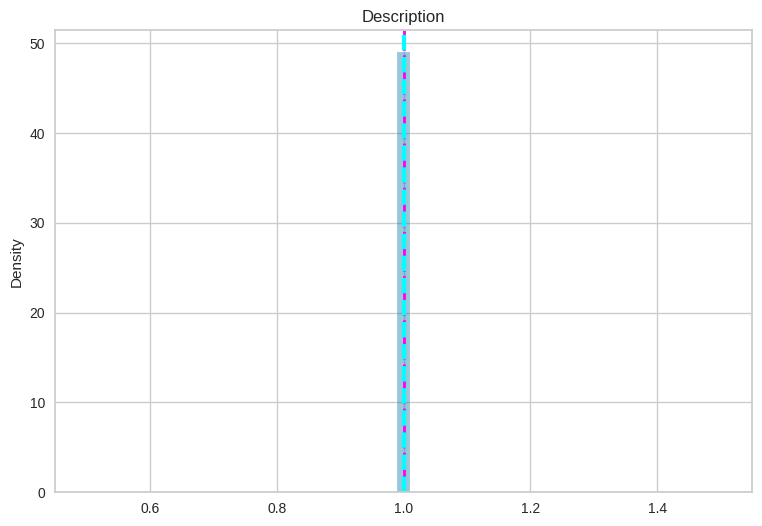

In [49]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypothesis_2)
sns.distplot(hypothesis_2)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=3)
ax.set_title('Description')
plt.show()
     

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Overall Netflix released number of movies and TV shows 500?

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value
hypothesis_3=df["release_year"]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 500
sample_mean = hypothesis_3.mean()
size = len(hypothesis_3)
std=(variance(hypothesis_3))**0.5

In [51]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypothesis_3,col="Ratings")
# Getting Conclusion
print(conclusion(p))
     

Failed to reject the Null Hypothesis for p = 1.0.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

z-test is used to do statistical test which gives the p-value

##### Why did you choose the specific statistical test?

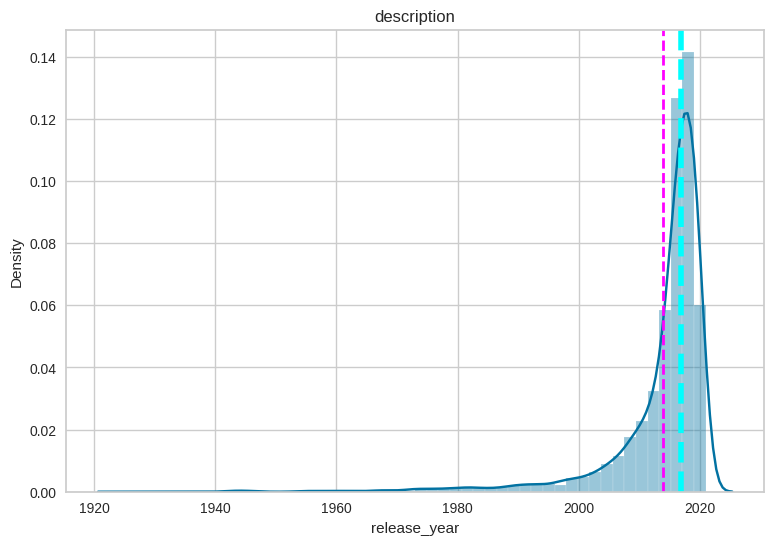

In [52]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypothesis_3)
sns.distplot(hypothesis_3)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)
ax.set_title('description')
plt.show()
     


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [53]:
# Handling Missing Values & Missing Value Imputation
print(f"Before Handling Null Values: {df.shape}")
df[['cast','country','director']] = df[['cast','country','director']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0,inplace=True)
print(f"After Handling Null Values: {df.shape}")

Before Handling Null Values: (7787, 13)
After Handling Null Values: (7777, 13)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.
Handling missing values is an important step to handle data integrity and consistency. Here if we remove the null values only from one feature which contain more Null values from director we will lose the data from other variables. So, I used to replace with Unknown.rating column's missing values fill with mode.

### 2. Handling Outliers

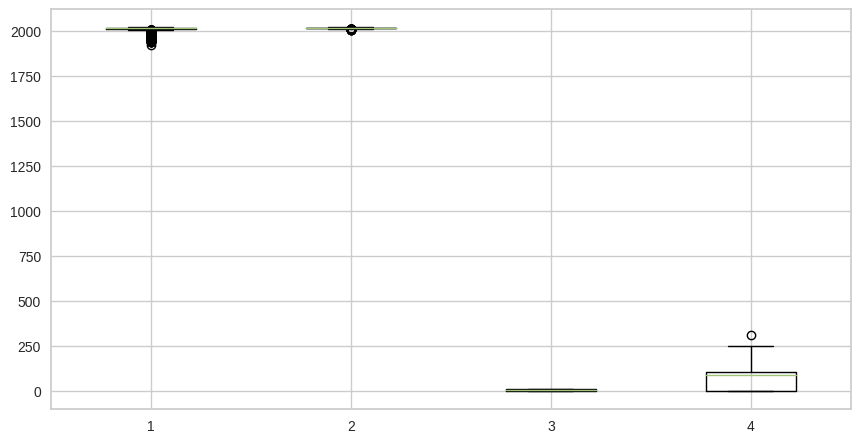

In [54]:
# Handling Outliers & Outlier treatments
out_data = [df['release_year'], df['year'], df['month'], df['duration']]
fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(out_data)
# show plot
plt.show()
     

In [ ]:
scaler = RobustScaler()
cleaned_data = scaler.fit_transform(out_data)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

RobustScaler: We can use the RobustScaler from the scikit-learn library to scale the data in a way that is robust to outliers. The RobustScaler scales the data based on the interquartile range (IQR) instead of the mean and standard deviation, making it less sensitive to outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [55]:
# Handling the data for Data Preprocessing
df.fillna('',inplace=True)
     

In [56]:
# Combining all the clustering attributes into a single column

df['cluster_attributes'] = (df['director'] + ' ' + 
                              df['cast'] +' ' + 
                                df['country'] +' ' + 
                                df['listed_in'] +' ' + 
                                df['description'])

In [57]:
df['cluster_attributes'].head()

0    Unknown João Miguel, Bianca Comparato, Michel ...
1    Jorge Michel Grau Demián Bichir, Héctor Bonill...
2    Gilbert Chan Tedd Chan, Stella Chung, Henley H...
3    Shane Acker Elijah Wood, John C. Reilly, Jenni...
4    Robert Luketic Jim Sturgess, Kevin Spacey, Kat...
Name: cluster_attributes, dtype: object

#### 1. Removing Non-ASCII Characters

In [58]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [59]:
# remove non-ascii characters
df['cluster_attributes'] = remove_non_ascii(df['cluster_attributes'])
     


In [60]:
df['cluster_attributes'][4]

'Robert Luketic Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin United States Dramas A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.'

#### 2. Lower Casing

In [61]:
# Lower Casing
df['cluster_attributes']=df['cluster_attributes'].str.lower()

#### 3. Removing Punctuations

In [67]:
# Remove Punctuations
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [63]:
# remove punctuations characters
df['cluster_attributes'] = df['cluster_attributes'].apply(remove_punctuation)

In [64]:
df['cluster_attributes'][4]

'robert luketic jim sturgess kevin spacey kate bosworth aaron yoo liza lapira jacob pitts laurence fishburne jack mcgee josh gad sam golzari helen carey jack gilpin united states dramas a brilliant group of students become cardcounting experts with the intent of swindling millions out of las vegas casinos by playing blackjack'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [68]:
# Remove Stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [69]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [70]:
# Removing stop words
df['cluster_attributes'] = df['cluster_attributes'].apply(stopwords)

In [71]:
df['cluster_attributes'][4]

'robert luketic jim sturgess kevin spacey kate bosworth aaron yoo liza lapira jacob pitts laurence fishburne jack mcgee josh gad sam golzari helen carey jack gilpin united states dramas brilliant group students become cardcounting experts intent swindling millions las vegas casinos playing blackjack'

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [72]:
# Tokenization
tokenizer = TweetTokenizer()

In [73]:
# remove non-ascii characters
df['cluster_attributes'] = (df['cluster_attributes']).apply(lambda x: tokenizer.tokenize(x))

In [74]:
df['cluster_attributes'][4]

['robert',
 'luketic',
 'jim',
 'sturgess',
 'kevin',
 'spacey',
 'kate',
 'bosworth',
 'aaron',
 'yoo',
 'liza',
 'lapira',
 'jacob',
 'pitts',
 'laurence',
 'fishburne',
 'jack',
 'mcgee',
 'josh',
 'gad',
 'sam',
 'golzari',
 'helen',
 'carey',
 'jack',
 'gilpin',
 'united',
 'states',
 'dramas',
 'brilliant',
 'group',
 'students',
 'become',
 'cardcounting',
 'experts',
 'intent',
 'swindling',
 'millions',
 'las',
 'vegas',
 'casinos',
 'playing',
 'blackjack']

#### 8. Text Normalization

In [75]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
stemmer = SnowballStemmer('english')

In [76]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [77]:
df['cluster_attributes'] = df['cluster_attributes'].apply(lemmatize_verbs)

In [78]:
df['cluster_attributes'][4]

['robert',
 'luketic',
 'jim',
 'sturgess',
 'kevin',
 'spacey',
 'kate',
 'bosworth',
 'aaron',
 'yoo',
 'liza',
 'lapira',
 'jacob',
 'pitts',
 'laurence',
 'fishburne',
 'jack',
 'mcgee',
 'josh',
 'gad',
 'sam',
 'golzari',
 'helen',
 'carey',
 'jack',
 'gilpin',
 'unite',
 'state',
 'dramas',
 'brilliant',
 'group',
 'students',
 'become',
 'cardcounting',
 'experts',
 'intent',
 'swindle',
 'millions',
 'las',
 'vegas',
 'casinos',
 'play',
 'blackjack']

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [79]:
# Vectorizing Text
clustering_data = df['cluster_attributes']

In [80]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

In [81]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 224262 stored elements in Compressed Sparse Row format>

In [82]:
#shape of X
X.shape

(7777, 20000)

In [83]:
# converting X variable into array 
X = X.toarray()

##### Which text vectorization technique have you used and why?

*Answer* Here.

TF-IDF vectorization technique is used to represent text data in a numerical form that can be easily processed by machine learning models. It helps to identify the most important words in a document and provides a way to quantify the similarity between documents based on their word content.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

At a certain point, more features or dimensions can decrease a model's accuracy since there is more data that needs to be generalized — this is known as the curse of dimensionality. Dimensionality reduction is way to reduce the complexity of a model and avoid overfitting.

In [84]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA()
pca.fit(X)

PCA()

Text(0, 0.5, 'cumulative explained variance')

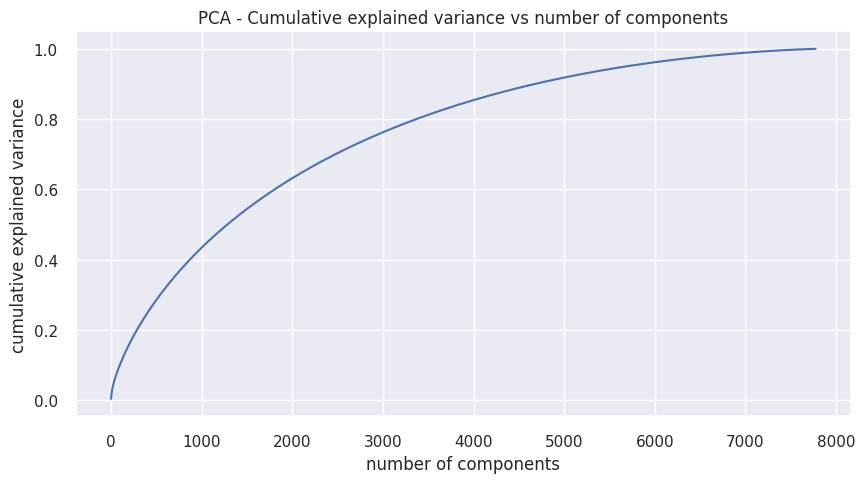

In [85]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

We find that 100% of the variance is explained by about ~7500 components. Also, more than 80% of the variance is explained just by 4000 components. Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [86]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [87]:
# transformed features
x_pca = pca.transform(X)

In [88]:
# shape of transformed vectors
x_pca.shape

(7777, 4000)

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=21), k=(4, 22),
                 metric='silhouette', timings=False)

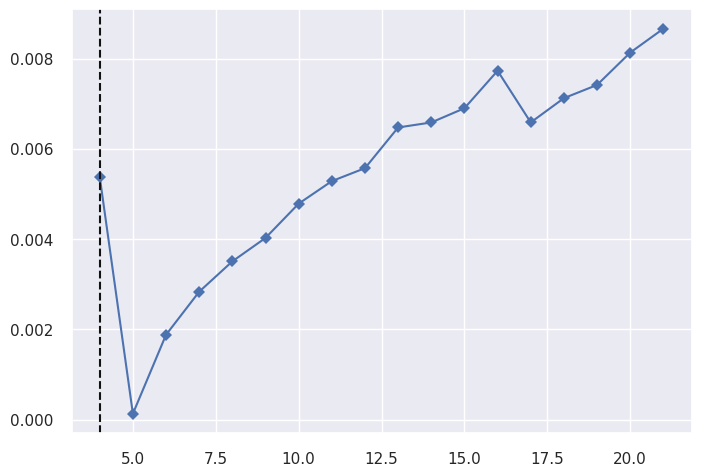

In [89]:
# ML Model - 1 Implementation

# Fit the Algorithm

kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(4,22), metric='silhouette', timings=False
)
 
# Predict on the model
visualizer.fit(x_pca)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [90]:
# Visualizing evaluation Metric Score chart
silhouette_score(x_pca,kmeans.labels_)

0.008663854927263426

#### 2. Cross- Validation & Hyperparameter Tuning

Text(0, 0.5, 'WCSS')

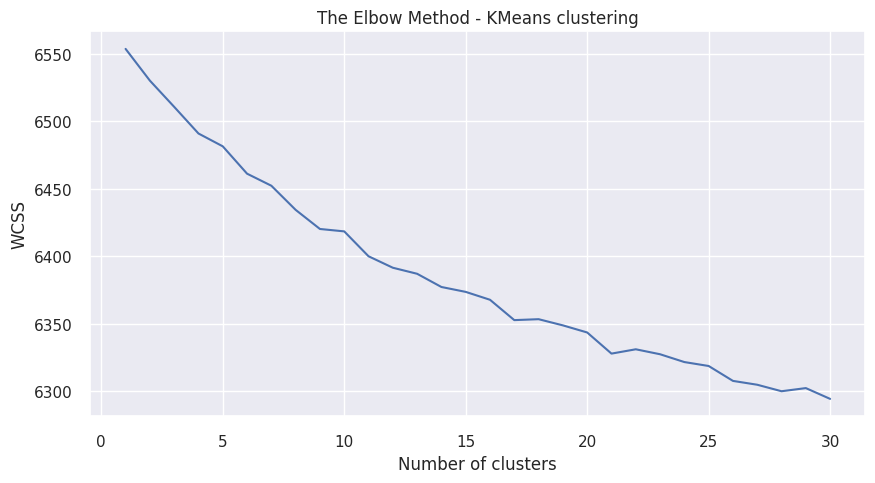

In [91]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Predict on the model

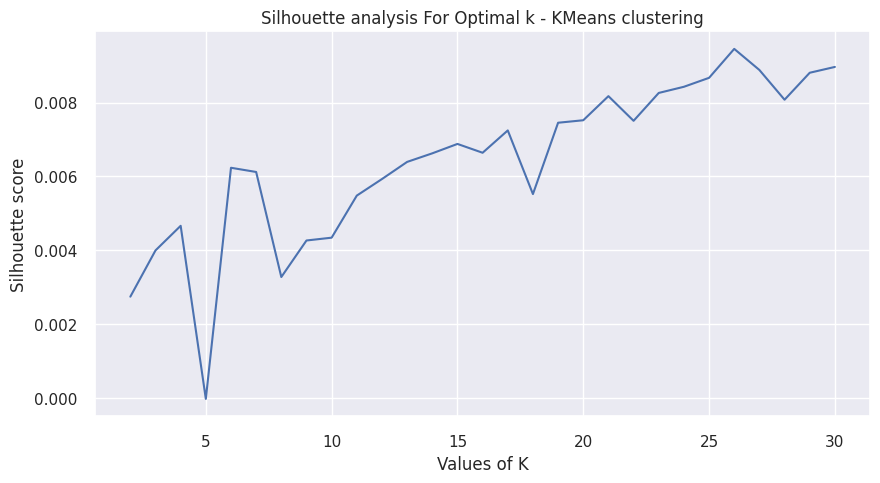

In [92]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [93]:
# Clustering the data into 9 clusters
kmeans = KMeans(n_clusters=9,init='k-means++',random_state=33)
kmeans.fit(x_pca)
     

KMeans(n_clusters=9, random_state=33)

In [94]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6420.2301719973275, 0.004261243912736653)


In [95]:
#predict the labels of clusters.
label = kmeans.fit_predict(x_pca)
     

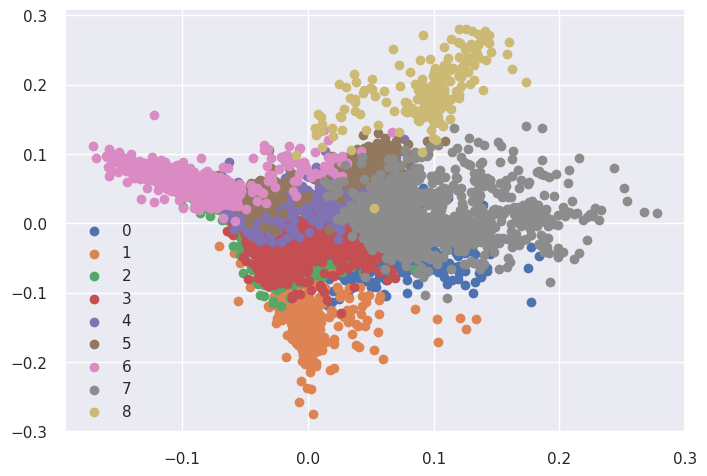

In [96]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(x_pca[label == i , 0] , x_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [97]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

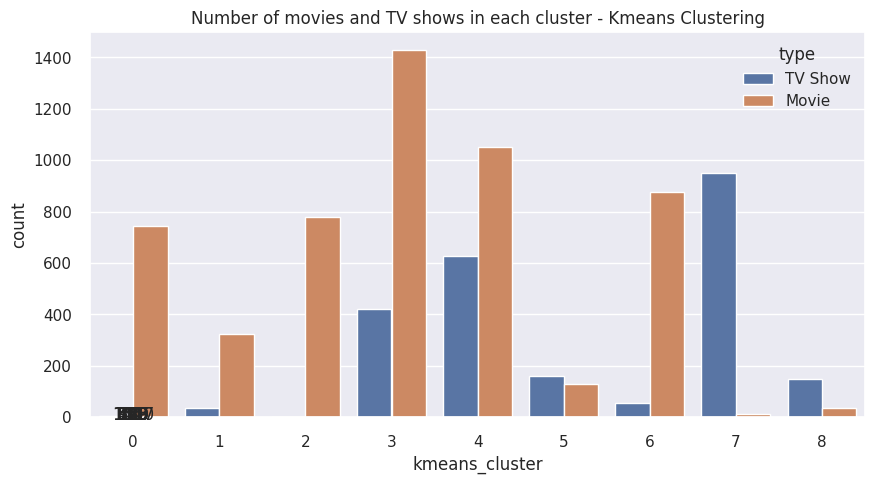

In [98]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10))

##### Which hyperparameter optimization technique have you used and why?

Answer Here.
The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.

Cluster wise analysis:

In [99]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

Cluster 0: Documentries

In [100]:
df[df['kmeans_cluster'] == 0][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                                              title  \
13    Movie                                              2,215   
25    Movie                                           (T)ERROR   
28    Movie                      #AnneFrank - Parallel Stories   
30    Movie                                   #cats_the_mewvie   
35    Movie                                          #Rucker50   
...     ...                                                ...   
7692  Movie  Ya no estoy aquí: Una conversación entre Guill...   
7771  Movie                                               Zion   
7773  Movie                                     Zoé: Panoramas   
7784  Movie                                  Zulu Man in Japan   
7786  Movie            ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                    director  \
13                       Nottapon Boonprakob   
25    Lyric R. Cabral, David Felix Sutcliffe   
28               Sabina Fedeli, Anna Migotto   
30                          Michael Margolis   
35                     Robert McCullough Jr.   
...                                      ...   
7692                                 Unknown   
7771                              Floyd Russ   
7773   Rodrigo Guardiola, Gabriel Cruz Rivas   
7784                                 Unknown   
7786                                Sam Dunn   

                                                   cast         country  \
13                                   Artiwara Kongmalai        Thailand   
25                                              Unknown   United States   
28                          Helen Mirren, Gengher Gatti           Italy   
30                                              Unknown          Canada   
35                                              Unknown   United States   
...                                                 ...             ...   
7692                 Guillermo del Toro, Alfonso Cuarón             nan   
7771                                         Zion Clark   United States   
7773  Sergio Acosta, Jesús Báez, Ángel Mosqueda, Rod...          Mexico   
7784                                            Nasty C             nan   
7786                                            Unknown  United Kingdom   

          rating      listed_in  \
13        Adults  Documentaries   
25        Adults  Documentaries   
28         Teens  Documentaries   
30         Teens  Documentaries   
35    Older Kids  Documentaries   
...          ...            ...   
7692  Older Kids  Documentaries   
7771  Older Kids  Documentaries   
7773      Adults  Documentaries   
7784      Adults  Documentaries   
7786      Adults  Documentaries   

                                            description  
13    This intimate documentary follows rock star Ar...  
25    This real-life look at FBI counterterrorism op...  
28    Through her diary, Anne Frank's story is retol...  
30    This pawesome documentary explores how our fel...  
35    This documentary celebrates the 50th anniversa...  
...                                                 ...  
7692  Guillermo del Toro and Alfonso Cuarón discuss ...  
7771  Born without legs and stuck in foster care for...  
7773  This introspective rockumentary follows the ca...  
7784  In this documentary, South African rapper Nast...  
7786  This documentary delves into the mystique behi...  

[746 rows x 8 columns]

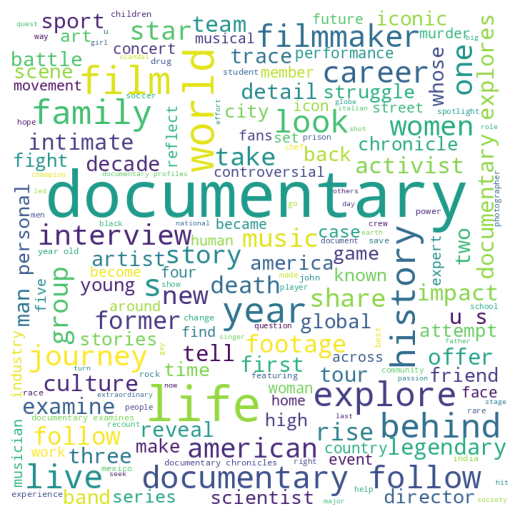

In [101]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

Cluster 1: Horror, Sports

In [102]:
df[df['kmeans_cluster'] == 1][['type','title','director','cast','country','rating','listed_in','description']]

type                                        title  \
197   TV Show             A Little Help with Carol Burnett   
220     Movie                   A Russell Peters Christmas   
305     Movie          Adam Devine: Best Time of Our Lives   
307     Movie                      ADAM SANDLER 100% FRESH   
310     Movie                 Adel Karam: Live from Beirut   
...       ...                                          ...   
7680    Movie                        Wyatt Cenac: Brooklyn   
7718    Movie               Yoo Byung Jae: Discomfort Zone   
7719    Movie          Yoo Byung Jae: Too Much Information   
7744    Movie                  Yours Sincerely, Kanan Gill   
7757    Movie  Zach Galifianakis: Live at the Purple Onion   

                director                                               cast  \
197              Unknown  Carol Burnett, Russell Peters, Mark Cuban, Tar...   
220   Henry Sarwer-Foner  Russell Peters, Pamela Anderson, Michael Bublé...   
305            Jay Karas                                        Adam Devine   
307          Steve Brill                                       Adam Sandler   
310              Unknown                                         Adel Karam   
...                  ...                                                ...   
7680         Wyatt Cenac                                        Wyatt Cenac   
7718       Y. Joon Chung                                      Yoo Byung Jae   
7719       Yoo Byung-jae                                      Yoo Byung-jae   
7744        Neville Shah                                         Kanan Gill   
7757     Michael Blieden                     Zach Galifianakis, Brian Unger   

            country  rating                     listed_in  \
197   United States    Kids  Stand-Up Comedy & Talk Shows   
220          Canada  Adults               Stand-Up Comedy   
305   United States  Adults               Stand-Up Comedy   
307   United States  Adults               Stand-Up Comedy   
310   United States  Adults               Stand-Up Comedy   
...             ...     ...                           ...   
7680  United States  Adults               Stand-Up Comedy   
7718    South Korea  Adults               Stand-Up Comedy   
7719            nan  Adults               Stand-Up Comedy   
7744          India  Adults               Stand-Up Comedy   
7757  United States  Adults               Stand-Up Comedy   

                                            description  
197   Comedy icon Carol Burnett returns to TV with a...  
220   Inspired by the variety shows of the 1970s, "A...  
305   Frenetic comic Adam Devine talks teen awkwardn...  
307   From "Heroes" to "Ice Cream Ladies" – Adam San...  
310   From Casino du Liban, Lebanese actor and comed...  
...                                                 ...  
7680  Wyatt Cenac heads to Brooklyn to share his obs...  
7718  Daring comedian Yoo Byung-jae connects critici...  
7719  "Saturday Night Live Korea" writer-turned-come...  
7744  Revisiting life goals set in a letter written ...  
7757  The unorthodox, piano-playing stand-up star Za...  

[357 rows x 8 columns]

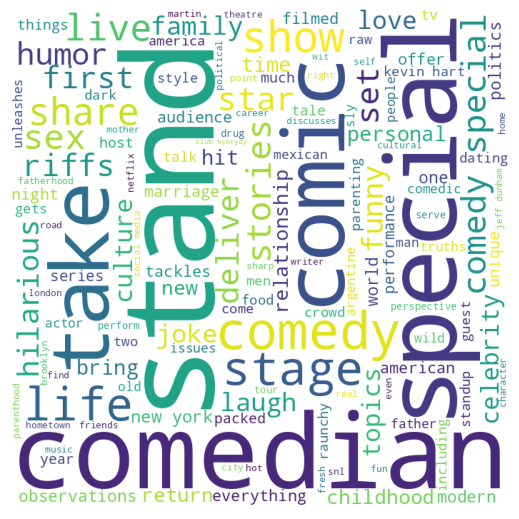

In [103]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

Cluster 2: Family Movies, Independent Movies

In [104]:
df[df['kmeans_cluster'] == 2][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]
     

type                                title             director  \
2     Movie                                23:59         Gilbert Chan   
14    Movie                                 3022           John Suits   
19    Movie                                  '89              Unknown   
41    Movie                           Ég man þig  Óskar Thór Axelsson   
55    Movie  100 Things to do Before High School              Unknown   
...     ...                                  ...                  ...   
7761  Movie                               Zapped        Peter DeLuise   
7765  Movie                            Zero Hour     Robert O. Peters   
7772  Movie    Zipi & Zape y la Isla del Capitan         Oskar Santos   
7776  Movie                             Zokkomon     Satyajit Bhatkal   
7781  Movie                                 Zoom         Peter Hewitt   

                                                   cast         country  \
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...       Singapore   
14    Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...   United States   
19                   Lee Dixon, Ian Wright, Paul Merson  United Kingdom   
41    Jóhannes Haukur Jóhannesson, Ágústa Eva Erlend...         Iceland   
55    Isabela Moner, Jaheem Toombs, Owen Joyner, Jac...   United States   
...                                                 ...             ...   
7761  Zendaya, Chanelle Peloso, Spencer Boldman, Emi...          Canada   
7765  Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...             nan   
7772  Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...           Spain   
7776  Darsheel Safary, Anupam Kher, Manjari Fadnis, ...           India   
7781  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   United States   

          rating                 listed_in  \
2         Adults             Horror Movies   
14        Adults        Independent Movies   
19    Older Kids             Sports Movies   
41        Adults             Horror Movies   
55          Kids                    Movies   
...          ...                       ...   
7761        Kids  Children & Family Movies   
7765      Adults      International Movies   
7772  Older Kids  Children & Family Movies   
7776  Older Kids  Children & Family Movies   
7781  Older Kids  Children & Family Movies   

                                            description  
2     When an army recruit is found dead, his fellow...  
14    Stranded when the Earth is suddenly destroyed ...  
19    Mixing old footage with interviews, this is th...  
41    Young urbanites renovating a rundown house, an...  
55    Led by seventh-grader C.J., three students who...  
...                                                 ...  
7761  A girl discovers a dog-training app that can g...  
7765  After his father passes, the heir to a retail ...  
7772  At Christmas, Zip and Zap take a trip with the...  
7776  When his cruel uncle abandons him, a young orp...  
7781  Dragged from civilian life, a former superhero...  

[780 rows x 8 columns]

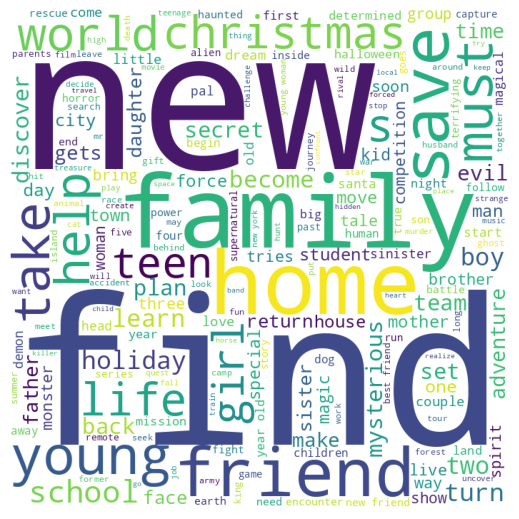

In [105]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

Cluster 3: Dramas, Comedies

In [106]:
df[df['kmeans_cluster'] == 3][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]
     

type                       title         director  \
3       Movie                           9      Shane Acker   
4       Movie                          21   Robert Luketic   
7       Movie                         187   Kevin Reynolds   
10      Movie                        1922     Zak Hilditch   
29    TV Show                    #blackAF          Unknown   
...       ...                         ...              ...   
7755  TV Show                    Z Nation          Unknown   
7758    Movie  Zack and Miri Make a Porno      Kevin Smith   
7759  TV Show                   Zak Storm          Unknown   
7774    Movie                      Zodiac    David Fincher   
7778    Movie                  Zombieland  Ruben Fleischer   

                                                   cast        country  \
3     Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
7     Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
10    Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...  United States   
29    Kenya Barris, Rashida Jones, Iman Benson, Genn...  United States   
...                                                 ...            ...   
7755  Nat Zang, Russell Hodgkinson, Michael Welch, A...  United States   
7758  Seth Rogen, Elizabeth Banks, Craig Robinson, J...  United States   
7759  Michael Johnston, Jessica Gee-George, Christin...  United States   
7774  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
7778  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   

          rating              listed_in  \
3          Teens     Action & Adventure   
4          Teens                 Dramas   
7         Adults                 Dramas   
10        Adults                 Dramas   
29        Adults            TV Comedies   
...          ...                    ...   
7755      Adults  TV Action & Adventure   
7758      Adults               Comedies   
7759  Older Kids               Kids' TV   
7774      Adults            Cult Movies   
7778      Adults               Comedies   

                                            description  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
7     After one of his high school students attacks ...  
10    A farmer pens a confession admitting to his wi...  
29    Kenya Barris and his family navigate relations...  
...                                                 ...  
7755  A team embarks on a perilous cross-country mis...  
7758  Zack and Miri make and star in an adult film t...  
7759  Teen surfer Zak Storm is mysteriously transpor...  
7774  A political cartoonist, a crime reporter and a...  
7778  Looking to survive in a world taken over by zo...  

[1846 rows x 8 columns]

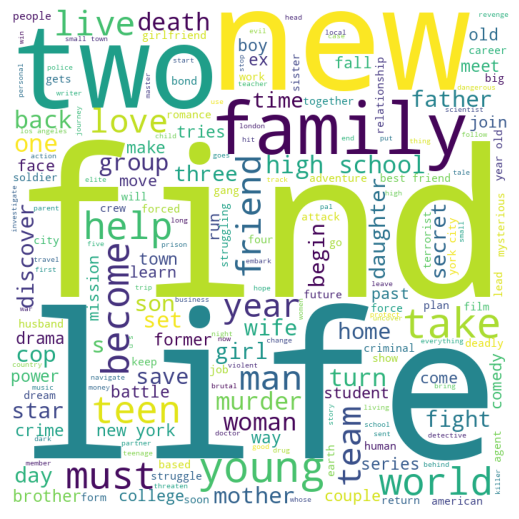

In [107]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

Cluster 4: Crime, Anime shows

In [108]:
df[df['kmeans_cluster'] == 4][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type               title           director  \
0     TV Show                  3%            Unknown   
1       Movie                7:19  Jorge Michel Grau   
5     TV Show                  46        Serdar Akar   
6       Movie                 122    Yasir Al Yasiri   
11    TV Show                1983            Unknown   
...       ...                 ...                ...   
7767  TV Show  Zindagi Gulzar Hai            Unknown   
7770    Movie             Zinzana    Majid Al Ansari   
7775  TV Show          Zoids Wild            Unknown   
7779  TV Show           Zona Rosa            Unknown   
7782    Movie                Zozo        Josef Fares   

                                                   cast               country  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...                Brazil   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...                Mexico   
5     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                Turkey   
6     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...                 Egypt   
11    Robert Więckiewicz, Maciej Musiał, Michalina O...                Poland   
...                                                 ...                   ...   
7767  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...              Pakistan   
7770  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...  United Arab Emirates   
7775  Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...                 Japan   
7779  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...                Mexico   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...                Sweden   

          rating               listed_in  \
0         Adults  International TV Shows   
1         Adults                  Dramas   
5         Adults  International TV Shows   
6         Adults           Horror Movies   
11        Adults          Crime TV Shows   
...          ...                     ...   
7767  Older Kids  International TV Shows   
7770      Adults                  Dramas   
7775  Older Kids            Anime Series   
7779      Adults  International TV Shows   
7782      Adults                  Dramas   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
5     A genetics professor experiments with a treatm...  
6     After an awful accident, a couple admitted to ...  
11    In this dark alt-history thriller, a naïve law...  
...                                                 ...  
7767  Strong-willed, middle-class Kashaf and carefre...  
7770  Recovering alcoholic Talal wakes up inside a s...  
7775  A quest for freedom and legendary treasure beg...  
7779  An assortment of talent takes the stage for a ...  
7782  When Lebanon's Civil War deprives Zozo of his ...  

[1679 rows x 8 columns]

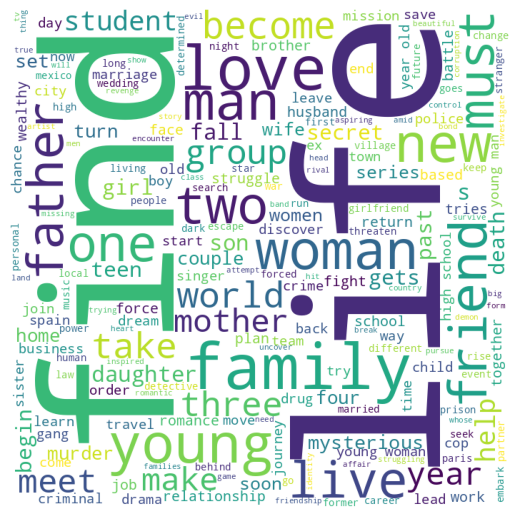

In [109]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)
     

Cluster 5: Action & Adventure, International TV shows

In [110]:
df[df['kmeans_cluster'] == 5][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                      title              director  \
68      Movie                  14 Blades            Daniel Lee   
149     Movie           A Beautiful Life  Andrew Lau Wai-Keung   
152   TV Show         A Boy Name Flora A               Unknown   
157     Movie                     A Choo   Kevin Ko, Peter Tsi   
180   TV Show                A Good Wife               Unknown   
...       ...                        ...                   ...   
7709  TV Show                Yes We Can!               Unknown   
7733  TV Show          You're My Destiny               Unknown   
7737    Movie                Young Tiger                Mu Chu   
7741    Movie  Your Name Engraved Herein         Liu Kuang-hui   
7743  TV Show            Yours Fatefully               Unknown   

                                                   cast    country  rating  \
68    Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...  Hong Kong  Adults   
149   Qi Shu, Liu Ye, Anthony Wong Chau-Sang, Liang ...      China   Teens   
152   Crowd Lu, Tsai Chen-nan, Lotus Wang, Fan Chu-M...     Taiwan  Adults   
157   Kai Ko, Ariel Lin, Darren Wang, Zhang Xiaolong...     Taiwan   Teens   
180   Tien Hsin, Christopher Lee, Darren Chiu, Shara...     Taiwan   Teens   
...                                                 ...        ...     ...   
7709  Romeo Tan, Rebecca Lim, Sora Ma, Xu Bin, Chen ...  Singapore   Teens   
7733  Joe Chen, Ethan Juan, Baron Chen, Bianca Bai, ...     Taiwan  Adults   
7737  Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...  Hong Kong  Adults   
7741  Edward Chen, Tseng Ching-hua, Leon Dai, Jason ...     Taiwan  Adults   
7743  Kingone Wang, Jesseca Liu, Xiang Yun, Chen Shu...  Singapore   Teens   

                   listed_in  \
68        Action & Adventure   
149                   Dramas   
152   International TV Shows   
157       Action & Adventure   
180   International TV Shows   
...                      ...   
7709  International TV Shows   
7733  International TV Shows   
7737      Action & Adventure   
7741                  Dramas   
7743  International TV Shows   

                                            description  
68    In the age of the Ming Dynasty, Quinglong is t...  
149   After meeting under awkward circumstances, a g...  
152   A 28-year-old layabout begins to re-examine hi...  
157   Determined to win the heart of his childhood c...  
180   As her seemingly idyllic life begins to crumbl...  
...                                                 ...  
7709  When a frustrated businessman starts his own f...  
7733  A young woman's romantic cruise ends in a twis...  
7737  Aided only by a tough female police officer, a...  
7741  In 1987, as martial law ends in Taiwan, Jia-ha...  
7743  Two lonely singles meet on a blind date and sl...  

[290 rows x 8 columns]

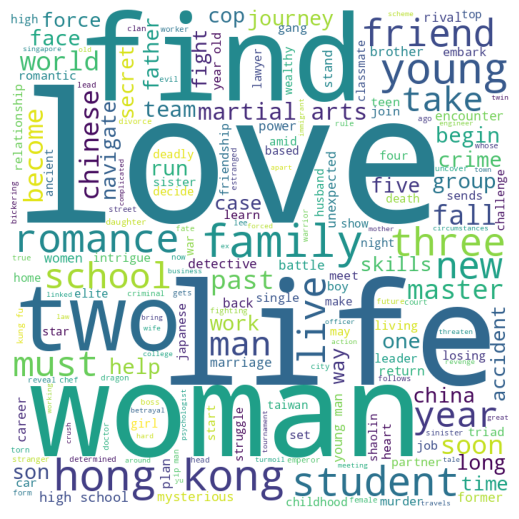

In [111]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

Cluster 6: India, Life

In [112]:
df[df['kmeans_cluster'] == 6][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]
     

type                     title            director  \
8     Movie                       706       Shravan Kumar   
9     Movie                      1920        Vikram Bhatt   
18    Movie                    15-Aug  Swapnaneel Jayakar   
20    Movie      ​​Kuch Bheege Alfaaz                Onir   
21    Movie              ​Goli Soda 2        Vijay Milton   
...     ...                       ...                 ...   
7764  Movie                      Zero          Aanand Rai   
7768  Movie  Zindagi Kitni Haseen Hay       Anjum Shahzad   
7769  Movie  Zindagi Na Milegi Dobara         Zoya Akhtar   
7780  Movie                       Zoo        Shlok Sharma   
7783  Movie                    Zubaan         Mozez Singh   

                                                   cast   country  rating  \
8     Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...     India   Teens   
9     Rajneesh Duggal, Adah Sharma, Indraneil Sengup...     India  Adults   
18    Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...     India   Teens   
20    Geetanjali Thapa, Zain Khan Durrani, Shray Rai...     India   Teens   
21    Samuthirakani, Bharath Seeni, Vinoth, Esakki B...     India   Teens   
...                                                 ...       ...     ...   
7764  Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...     India   Teens   
7768  Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...  Pakistan   Teens   
7769  Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...     India   Teens   
7780  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...     India  Adults   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...     India   Teens   

               listed_in                                        description  
8          Horror Movies  When a doctor goes missing, his psychiatrist w...  
9          Horror Movies  An architect and his wife move into a castle t...  
18              Comedies  On India's Independence Day, a zany mishap in ...  
20                Dramas  After accidentally connecting over the Interne...  
21    Action & Adventure  A taxi driver, a gangster and an athlete strug...  
...                  ...                                                ...  
7764            Comedies  Through his relationships with two wildly diff...  
7768              Dramas  Two young parents struggle to keep their marri...  
7769            Comedies  Three friends on an adventurous road trip/bach...  
7780              Dramas  A drug dealer starts having doubts about his t...  
7783              Dramas  A scrappy but poor boy worms his way into a ty...  

[933 rows x 8 columns]

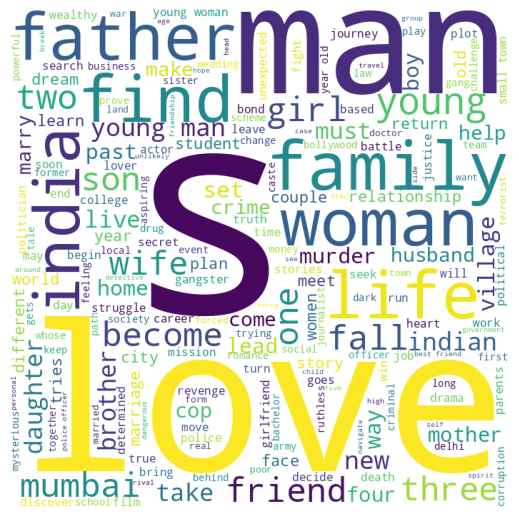

In [113]:
# Wordcloud for cluster 6
kmeans_worldcloud(6)

Cluster 7: Reality TV shows, Series

In [114]:
df[df['kmeans_cluster'] == 7][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                  title              director  \
12    TV Show                   1994  Diego Enrique Osorno   
26    TV Show               (Un)Well               Unknown   
53    TV Show             100 Humans               Unknown   
58    TV Show            100% Hotter               Unknown   
85    TV Show               21 Again               Unknown   
...       ...                    ...                   ...   
7730  TV Show           You vs. Wild               Unknown   
7738  TV Show        Young Wallander               Unknown   
7766  TV Show           Zig & Sharko               Unknown   
7777  TV Show            Zombie Dumb               Unknown   
7785  TV Show  Zumbo's Just Desserts               Unknown   

                                                   cast         country  \
12                                              Unknown          Mexico   
26                                              Unknown   United States   
53               Zainab Johnson, Sammy Obeid, Alie Ward   United States   
58    Daniel Palmer, Melissa Sophia, Karen Williams,...  United Kingdom   
85                                         Laura Morgan  United Kingdom   
...                                                 ...             ...   
7730                                        Bear Grylls   United States   
7738  Adam Pålsson, Richard Dillane, Leanne Best, El...  United Kingdom   
7766                                            Unknown          France   
7777                                            Unknown             nan   
7785                         Adriano Zumbo, Rachel Khoo       Australia   

          rating               listed_in  \
12        Adults          Crime TV Shows   
26        Adults              Reality TV   
53         Teens              Docuseries   
58         Teens        British TV Shows   
85        Adults        British TV Shows   
...          ...                     ...   
7730  Older Kids                Kids' TV   
7738      Adults          Crime TV Shows   
7766  Older Kids                Kids' TV   
7777  Older Kids                Kids' TV   
7785  Older Kids  International TV Shows   

                                            description  
12    Archival video and new interviews examine Mexi...  
26    This docuseries takes a deep dive into the luc...  
53    One hundred hardy souls from diverse backgroun...  
58    A stylist, a hair designer and a makeup artist...  
85    In a social experiment, a group of daughters s...  
...                                                 ...  
7730  In this interactive series, you'll make key de...  
7738  An incendiary hate crime stirs civil unrest, f...  
7766  Zig, an island-bound hyena, will do anything t...  
7777  While living alone in a spooky town, a young g...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  

[961 rows x 8 columns]

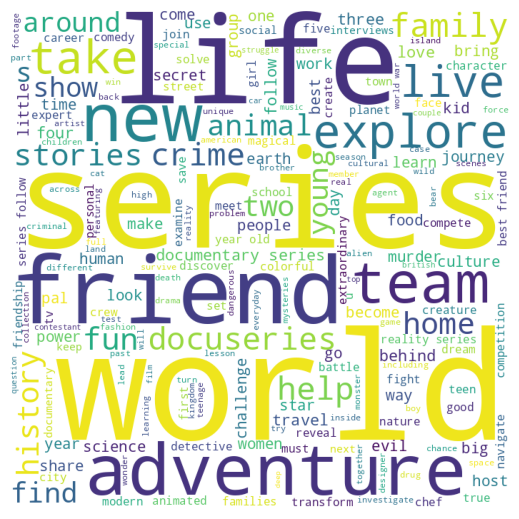

In [115]:
# Wordcloud for cluster 7
kmeans_worldcloud(7)

Cluster 8: South Korea Shows and movies

In [116]:
df[df['kmeans_cluster'] == 8][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                        title       director  \
27      Movie                       #Alive         Cho Il   
51    TV Show           100 Days My Prince        Unknown   
61    TV Show             12 Years Promise        Unknown   
91      Movie                     26 Years  Geun-hyun Cho   
95    TV Show                     28 Moons        Unknown   
...       ...                          ...            ...   
7551    Movie    What Happened to Mr. Cha?   Kim Dong-kyu   
7555  TV Show  What in the World Happened?        Unknown   
7583  TV Show     When the Camellia Blooms        Unknown   
7601  TV Show                 White Nights        Unknown   
7711  TV Show    YG Future Strategy Office        Unknown   

                                                   cast      country  \
27                             Yoo Ah-in, Park Shin-hye  South Korea   
51    Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...  South Korea   
61    So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...  South Korea   
91    Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...  South Korea   
95    Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Ge...  South Korea   
...                                                 ...          ...   
7551           Cha In-pyo, Cho Dal-hwan, Song Jae-ryong  South Korea   
7555  Eun-mi Go, Jaehyo, Eun-Hyung Jo, Ha-yeon Kim, ...  South Korea   
7583  Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...  South Korea   
7601  Yo-Won Lee, Goo Jin, U-ie, Hae-in Jung, Gook-h...  South Korea   
7711  Seungri, Yoo Byung Jae, Lee Jai-jin, Jinu, Son...  South Korea   

          rating               listed_in  \
27        Adults           Horror Movies   
51         Teens  International TV Shows   
61         Teens  International TV Shows   
91        Adults                  Dramas   
95    Older Kids  International TV Shows   
...          ...                     ...   
7551      Adults                Comedies   
7555       Teens  International TV Shows   
7583       Teens  International TV Shows   
7601       Teens  International TV Shows   
7711      Adults  International TV Shows   

                                            description  
27    As a grisly virus rampages a city, a lone man ...  
51    Upon losing his memory, a crown prince encount...  
61    A pregnant teen is forced by her family to lea...  
91    Twenty-six years after the 1980 massacre at Gw...  
95    When her fiancé acts strangely upon receiving ...  
...                                                 ...  
7551  With the peak of his career long behind him, a...  
7555  A happy secret romance between a 40-year-old w...  
7583  Dongbaek is a single mother. When a potential ...  
7601  A coldhearted heiress, a man from her past and...  
7711  K-pop star Seungri, BIGBANG's youngest member,...  

[185 rows x 8 columns]

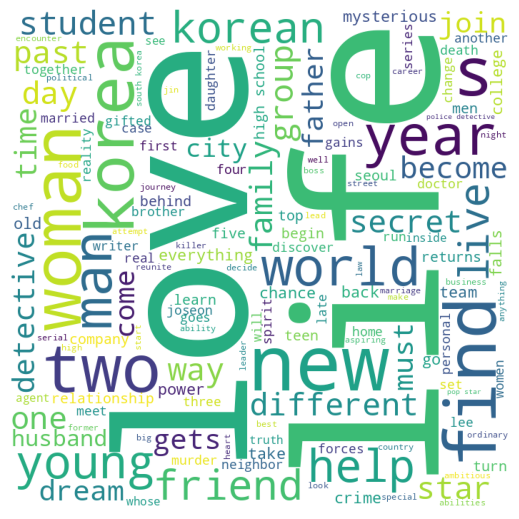

In [117]:
# Wordcloud for cluster 
kmeans_worldcloud(8)

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

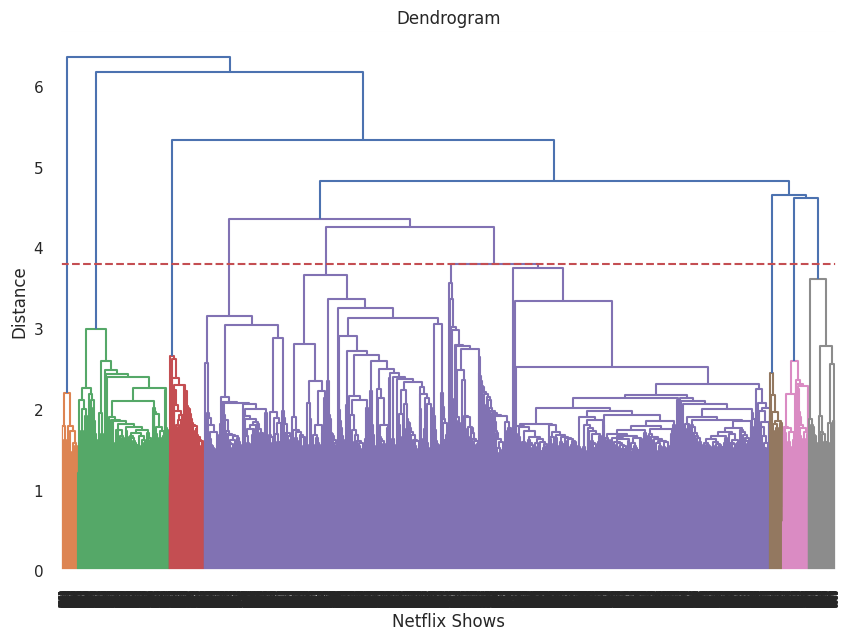

In [118]:
# Visualizing evaluation Metric Score chart
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')
     

At distance of 3.8 units, 9 clusters can be built using Agglomeration Clustering algorithm.

In [119]:
#Hirarchical model implementation
hierarchical = AgglomerativeClustering(n_clusters = 9, affinity= 'euclidean', linkage = 'ward')
hierarchical.fit_predict(x_pca)

array([1, 1, 3, ..., 8, 8, 8])

In [120]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_
     

In [121]:
#Evaluation metrics
print(silhouette_score(x_pca, hierarchical.labels_))

0.0015739232384320242


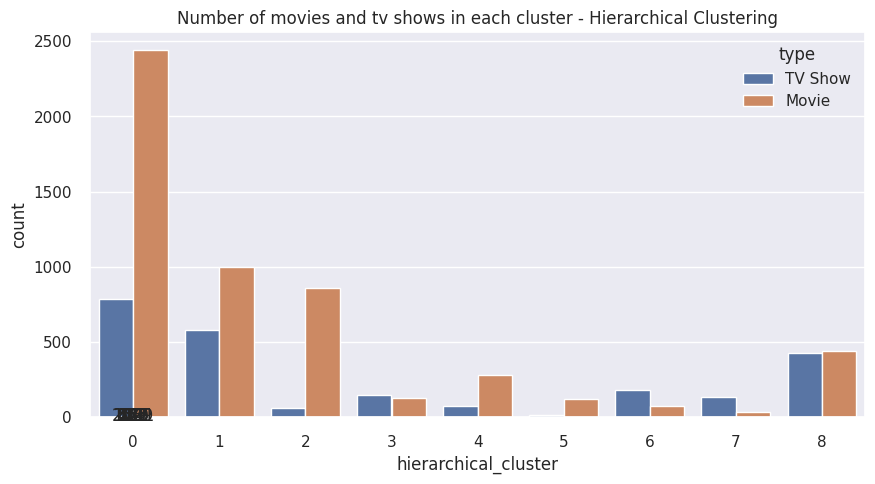

In [122]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10))

In [123]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

In [124]:
df[df['hierarchical_cluster'] == 0][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type        title         director  \
3       Movie            9      Shane Acker   
4       Movie           21   Robert Luketic   
7       Movie          187   Kevin Reynolds   
8       Movie          706    Shravan Kumar   
10      Movie         1922     Zak Hilditch   
...       ...          ...              ...   
7771    Movie         Zion       Floyd Russ   
7774    Movie       Zodiac    David Fincher   
7777  TV Show  Zombie Dumb          Unknown   
7778    Movie   Zombieland  Ruben Fleischer   
7781    Movie         Zoom     Peter Hewitt   

                                                   cast        country  \
3     Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
7     Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8     Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
10    Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...  United States   
...                                                 ...            ...   
7771                                         Zion Clark  United States   
7774  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
7777                                            Unknown            nan   
7778  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
7781  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   

          rating                 listed_in  \
3          Teens        Action & Adventure   
4          Teens                    Dramas   
7         Adults                    Dramas   
8          Teens             Horror Movies   
10        Adults                    Dramas   
...          ...                       ...   
7771  Older Kids             Documentaries   
7774      Adults               Cult Movies   
7777  Older Kids                  Kids' TV   
7778      Adults                  Comedies   
7781  Older Kids  Children & Family Movies   

                                            description  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
7     After one of his high school students attacks ...  
8     When a doctor goes missing, his psychiatrist w...  
10    A farmer pens a confession admitting to his wi...  
...                                                 ...  
7771  Born without legs and stuck in foster care for...  
7774  A political cartoonist, a crime reporter and a...  
7777  While living alone in a spooky town, a young g...  
7778  Looking to survive in a world taken over by zo...  
7781  Dragged from civilian life, a former superhero...  

[3225 rows x 8 columns]

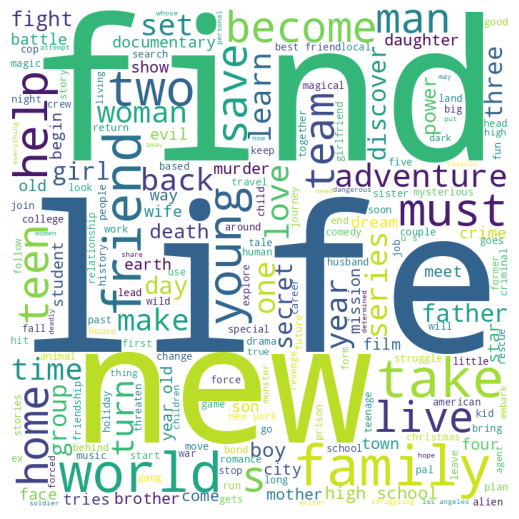

In [125]:
# Wordcloud for cluster 
hierarchical_worldcloud(0)

In [126]:
df[df['hierarchical_cluster'] == 1][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]
     

type                              title  \
0     TV Show                                 3%   
1       Movie                               7:19   
5     TV Show                                 46   
11    TV Show                               1983   
12    TV Show                               1994   
...       ...                                ...   
7768    Movie           Zindagi Kitni Haseen Hay   
7770    Movie                            Zinzana   
7772    Movie  Zipi & Zape y la Isla del Capitan   
7773    Movie                     Zoé: Panoramas   
7782    Movie                               Zozo   

                                   director  \
0                                   Unknown   
1                         Jorge Michel Grau   
5                               Serdar Akar   
11                                  Unknown   
12                     Diego Enrique Osorno   
...                                     ...   
7768                          Anjum Shahzad   
7770                        Majid Al Ansari   
7772                           Oskar Santos   
7773  Rodrigo Guardiola, Gabriel Cruz Rivas   
7782                            Josef Fares   

                                                   cast               country  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...                Brazil   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...                Mexico   
5     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                Turkey   
11    Robert Więckiewicz, Maciej Musiał, Michalina O...                Poland   
12                                              Unknown                Mexico   
...                                                 ...                   ...   
7768  Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...              Pakistan   
7770  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...  United Arab Emirates   
7772  Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...                 Spain   
7773  Sergio Acosta, Jesús Báez, Ángel Mosqueda, Rod...                Mexico   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...                Sweden   

          rating                 listed_in  \
0         Adults    International TV Shows   
1         Adults                    Dramas   
5         Adults    International TV Shows   
11        Adults            Crime TV Shows   
12        Adults            Crime TV Shows   
...          ...                       ...   
7768       Teens                    Dramas   
7770      Adults                    Dramas   
7772  Older Kids  Children & Family Movies   
7773      Adults             Documentaries   
7782      Adults                    Dramas   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
5     A genetics professor experiments with a treatm...  
11    In this dark alt-history thriller, a naïve law...  
12    Archival video and new interviews examine Mexi...  
...                                                 ...  
7768  Two young parents struggle to keep their marri...  
7770  Recovering alcoholic Talal wakes up inside a s...  
7772  At Christmas, Zip and Zap take a trip with the...  
7773  This introspective rockumentary follows the ca...  
7782  When Lebanon's Civil War deprives Zozo of his ...  

[1579 rows x 8 columns]

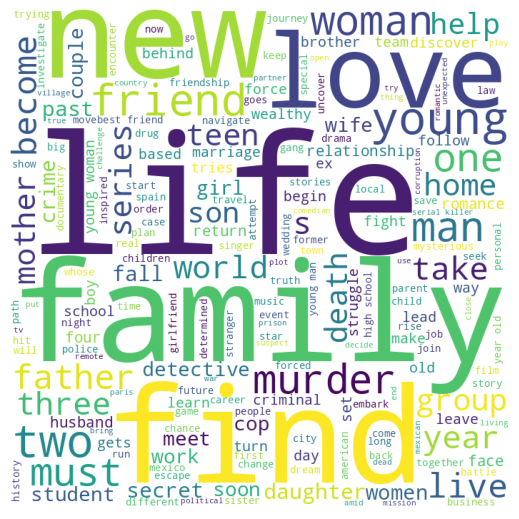

In [127]:
# Wordcloud for cluster 
hierarchical_worldcloud(1)
     

In [128]:
df[df['hierarchical_cluster'] == 2][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                     title            director  \
9     Movie                      1920        Vikram Bhatt   
18    Movie                    15-Aug  Swapnaneel Jayakar   
20    Movie      ​​Kuch Bheege Alfaaz                Onir   
21    Movie              ​Goli Soda 2        Vijay Milton   
22    Movie        ​Maj Rati ​​Keteki   Santwana Bardoloi   
...     ...                       ...                 ...   
7764  Movie                      Zero          Aanand Rai   
7769  Movie  Zindagi Na Milegi Dobara         Zoya Akhtar   
7776  Movie                  Zokkomon    Satyajit Bhatkal   
7780  Movie                       Zoo        Shlok Sharma   
7783  Movie                    Zubaan         Mozez Singh   

                                                   cast country      rating  \
9     Rajneesh Duggal, Adah Sharma, Indraneil Sengup...   India      Adults   
18    Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...   India       Teens   
20    Geetanjali Thapa, Zain Khan Durrani, Shray Rai...   India       Teens   
21    Samuthirakani, Bharath Seeni, Vinoth, Esakki B...   India       Teens   
22    Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...   India       Teens   
...                                                 ...     ...         ...   
7764  Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...   India       Teens   
7769  Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...   India       Teens   
7776  Darsheel Safary, Anupam Kher, Manjari Fadnis, ...   India  Older Kids   
7780  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   India      Adults   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   India       Teens   

                     listed_in  \
9                Horror Movies   
18                    Comedies   
20                      Dramas   
21          Action & Adventure   
22                      Dramas   
...                        ...   
7764                  Comedies   
7769                  Comedies   
7776  Children & Family Movies   
7780                    Dramas   
7783                    Dramas   

                                            description  
9     An architect and his wife move into a castle t...  
18    On India's Independence Day, a zany mishap in ...  
20    After accidentally connecting over the Interne...  
21    A taxi driver, a gangster and an athlete strug...  
22    A successful writer returns to the town that l...  
...                                                 ...  
7764  Through his relationships with two wildly diff...  
7769  Three friends on an adventurous road trip/bach...  
7776  When his cruel uncle abandons him, a young orp...  
7780  A drug dealer starts having doubts about his t...  
7783  A scrappy but poor boy worms his way into a ty...  

[915 rows x 8 columns]

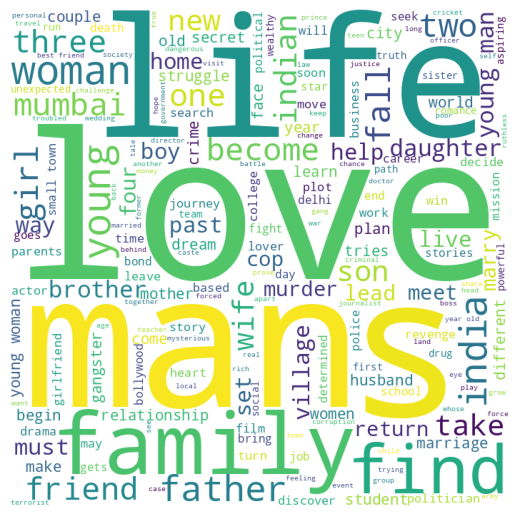

In [129]:
# Wordcloud for cluster 
hierarchical_worldcloud(2)
     

In [130]:
df[df['hierarchical_cluster'] == 3][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                      title              director  \
2       Movie                      23:59          Gilbert Chan   
68      Movie                  14 Blades            Daniel Lee   
149     Movie           A Beautiful Life  Andrew Lau Wai-Keung   
152   TV Show         A Boy Name Flora A               Unknown   
157     Movie                     A Choo   Kevin Ko, Peter Tsi   
...       ...                        ...                   ...   
7709  TV Show                Yes We Can!               Unknown   
7733  TV Show          You're My Destiny               Unknown   
7737    Movie                Young Tiger                Mu Chu   
7741    Movie  Your Name Engraved Herein         Liu Kuang-hui   
7743  TV Show            Yours Fatefully               Unknown   

                                                   cast    country  rating  \
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore  Adults   
68    Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...  Hong Kong  Adults   
149   Qi Shu, Liu Ye, Anthony Wong Chau-Sang, Liang ...      China   Teens   
152   Crowd Lu, Tsai Chen-nan, Lotus Wang, Fan Chu-M...     Taiwan  Adults   
157   Kai Ko, Ariel Lin, Darren Wang, Zhang Xiaolong...     Taiwan   Teens   
...                                                 ...        ...     ...   
7709  Romeo Tan, Rebecca Lim, Sora Ma, Xu Bin, Chen ...  Singapore   Teens   
7733  Joe Chen, Ethan Juan, Baron Chen, Bianca Bai, ...     Taiwan  Adults   
7737  Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...  Hong Kong  Adults   
7741  Edward Chen, Tseng Ching-hua, Leon Dai, Jason ...     Taiwan  Adults   
7743  Kingone Wang, Jesseca Liu, Xiang Yun, Chen Shu...  Singapore   Teens   

                   listed_in  \
2              Horror Movies   
68        Action & Adventure   
149                   Dramas   
152   International TV Shows   
157       Action & Adventure   
...                      ...   
7709  International TV Shows   
7733  International TV Shows   
7737      Action & Adventure   
7741                  Dramas   
7743  International TV Shows   

                                            description  
2     When an army recruit is found dead, his fellow...  
68    In the age of the Ming Dynasty, Quinglong is t...  
149   After meeting under awkward circumstances, a g...  
152   A 28-year-old layabout begins to re-examine hi...  
157   Determined to win the heart of his childhood c...  
...                                                 ...  
7709  When a frustrated businessman starts his own f...  
7733  A young woman's romantic cruise ends in a twis...  
7737  Aided only by a tough female police officer, a...  
7741  In 1987, as martial law ends in Taiwan, Jia-ha...  
7743  Two lonely singles meet on a blind date and sl...  

[276 rows x 8 columns]

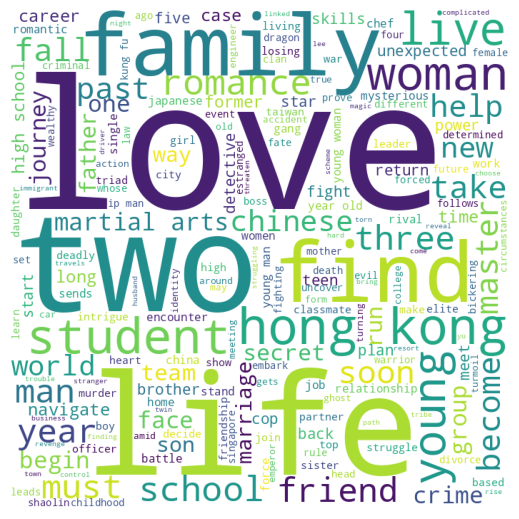

In [131]:
# Wordcloud for cluster 
hierarchical_worldcloud(3)
     

In [133]:
df[df['hierarchical_cluster'] == 4][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                                        title  \
29    TV Show                                     #blackAF   
192     Movie                              A Land Imagined   
220     Movie                   A Russell Peters Christmas   
257     Movie                                A Yellow Bird   
259   TV Show                      A.D. Kingdom and Empire   
...       ...                                          ...   
7604    Movie                 Whitney Cummings: Money Shot   
7656    Movie                Wonho Chung: Live in New York   
7662    Movie                                      Work It   
7757    Movie  Zach Galifianakis: Live at the Purple Onion   
7779  TV Show                                    Zona Rosa   

                director                                               cast  \
29               Unknown  Kenya Barris, Rashida Jones, Iman Benson, Genn...   
192         Yeo Siew Hua  Peter Yu, Liu Xiaoyi, Guo Yue, Ishtiaque Zico,...   
220   Henry Sarwer-Foner  Russell Peters, Pamela Anderson, Michael Bublé...   
257         K. Rajagopal  Sivakumar Palakrishnan, Huang Lu, Seema Biswas...   
259              Unknown  Juan Pablo Di Pace, Adam Levy, Chipo Chung, Ba...   
...                  ...                                                ...   
7604    John Fortenberry                                   Whitney Cummings   
7656           Shaun Mir                                        Wonho Chung   
7662       Laura Terruso  Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...   
7757     Michael Blieden                     Zach Galifianakis, Brian Unger   
7779             Unknown  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...   

            country  rating               listed_in  \
29    United States  Adults             TV Comedies   
192          France  Adults                  Dramas   
220          Canada  Adults         Stand-Up Comedy   
257       Singapore  Adults                  Dramas   
259   United States   Teens               TV Dramas   
...             ...     ...                     ...   
7604  United States  Adults         Stand-Up Comedy   
7656            nan   Teens         Stand-Up Comedy   
7662  United States   Teens                Comedies   
7757  United States  Adults         Stand-Up Comedy   
7779         Mexico  Adults  International TV Shows   

                                            description  
29    Kenya Barris and his family navigate relations...  
192   A cop in Singapore investigates the disappeara...  
220   Inspired by the variety shows of the 1970s, "A...  
257   In Singapore, a homeless ex-convict hoping to ...  
259   In the wake of Jesus Christ's crucifixion, his...  
...                                                 ...  
7604  Comedy Central roast veteran Whitney Cummings ...  
7656  At the Comic Strip's first Arabic stand-up sho...  
7662  A brilliant but clumsy high school senior vows...  
7757  The unorthodox, piano-playing stand-up star Za...  
7779  An assortment of talent takes the stage for a ...  

[354 rows x 8 columns]

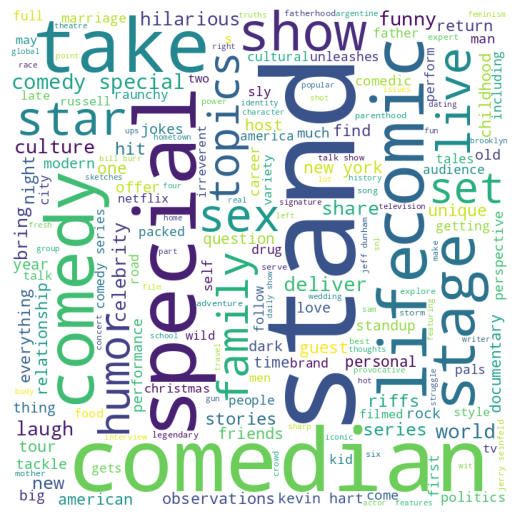

In [134]:
# Wordcloud for cluster 
hierarchical_worldcloud(4)

In [135]:
df[df['hierarchical_cluster'] == 5][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                      title           director  \
6     Movie                        122    Yasir Al Yasiri   
103   Movie          30 Days of Luxury         Hani Hamdi   
204   Movie  A Mission in an Old Movie     Ahmad El-Badri   
280   Movie                  Abdo Mota            Unknown   
381   Movie        Alexandria ... Why?    Youssef Chahine   
...     ...                        ...                ...   
7683  Movie                    X Large       Sherif Arafa   
7700  Movie                  يوم الدين    Abu Bakr Shawky   
7747  Movie                     اشتباك       Mohamed Diab   
7748  Movie                  الف مبروك  Ahmed Nader Galal   
7760  Movie                  Zaki Chan         Wael Ihsan   

                                                   cast country      rating  \
6     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   Egypt      Adults   
103   Taher Farouz, Sad Al-Saghir, Ahmad Faloks, Sol...   Egypt       Teens   
204   Edward, Fifi Abdo, Lotfy Labib, Madeleine Mata...     nan      Adults   
280                                     Mohamed Ramadan   Egypt      Adults   
381   Naglaa Fathi, Farid Shawqy, Mohsen Mohiedine, ...   Egypt      Adults   
...                                                 ...     ...         ...   
7683  Ahmed Helmy, Donia Samir Ghanim, Ibrahim Nasr,...   Egypt       Teens   
7700  Rady Gamal, Ahmed Abdelhafiz, Shahira Fahmy, S...   Egypt       Teens   
7747  Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...   Egypt       Teens   
7748  Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...   Egypt       Teens   
7760  Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...   Egypt  Older Kids   

               listed_in                                        description  
6          Horror Movies  After an awful accident, a couple admitted to ...  
103             Comedies  With the help of his friends, a man breaks out...  
204             Comedies  A young man struggles with his overbearing mot...  
280   Action & Adventure  Following the mysterious death of his parents,...  
381       Classic Movies  Living in Alexandria during World War II, an E...  
...                  ...                                                ...  
7683            Comedies  After he is rejected by the woman he loves and...  
7700              Dramas  A man cured of leprosy and a young orphan leav...  
7747              Dramas  Amid the tumult following Egyptian President M...  
7748            Comedies  On his wedding day, an arrogant, greedy accoun...  
7760            Comedies  An unqualified young man has his work cut out ...  

[133 rows x 8 columns]

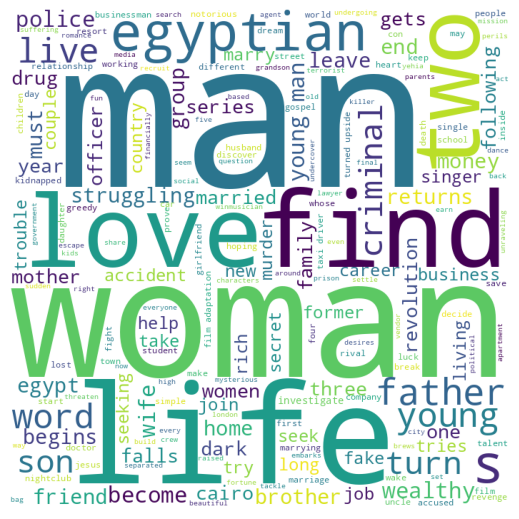

In [136]:
# Wordcloud for cluster 
hierarchical_worldcloud(5)

In [137]:
df[df['hierarchical_cluster'] == 6][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                                title      director  \
24    TV Show  ​SAINT SEIYA: Knights of the Zodiac       Unknown   
107     Movie                           37 Seconds        Hikari   
111   TV Show                              44 Cats       Unknown   
141   TV Show                               7SEEDS       Unknown   
228     Movie                       A Silent Voice  Naoko Yamada   
...       ...                                  ...           ...   
7716    Movie                 Yoko and His Friends       Unknown   
7740  TV Show                    Your lie in April       Unknown   
7749  TV Show                            Yu-Gi-Oh!       Unknown   
7750  TV Show                      Yu-Gi-Oh! Arc-V       Unknown   
7775  TV Show                           Zoids Wild       Unknown   

                                                   cast country      rating  \
24    Bryson Baugus, Emily Neves, Blake Shepard, Pat...   Japan       Teens   
107   Mei Kayama, Misuzu Kanno, Shunsuke Daitoh, Mak...   Japan      Adults   
111   Sarah Natochenny, Suzy Myers, Simona Berman, E...   Italy  Older Kids   
141   Nao Toyama, Jun Fukuyama, Katsuyuki Konishi, Y...     nan      Adults   
228   Miyu Irino, Saori Hayami, Aoi Yuki, Kensho Ono...   Japan       Teens   
...                                                 ...     ...         ...   
7716  Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...  Russia        Kids   
7740  Natsuki Hanae, Risa Taneda, Ayane Sakura, Ryot...   Japan       Teens   
7749  Dan Green, Eric Stuart, Amy Birnbaum, Darren D...   Japan  Older Kids   
7750  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   Japan  Older Kids   
7775  Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...   Japan  Older Kids   

                     listed_in  \
24                Anime Series   
107                     Dramas   
111                   Kids' TV   
141               Anime Series   
228             Anime Features   
...                        ...   
7716  Children & Family Movies   
7740              Anime Series   
7749              Anime Series   
7750              Anime Series   
7775              Anime Series   

                                            description  
24    Seiya and the Knights of the Zodiac rise again...  
107   Trapped by society and familial obligations, a...  
111   Paw-esome tales abound when singing furry frie...  
141   Shy Natsu awakens as part of a group chosen to...  
228   A former class bully reaches out to the deaf g...  
...                                                 ...  
7716  Vik meets new friends in a new city, where the...  
7740  After his mother's death, a piano prodigy's wi...  
7749  The lives of young Yugi Moto and his friends J...  
7750  Now that he's discovered the Pendulum Summonin...  
7775  A quest for freedom and legendary treasure beg...  

[255 rows x 8 columns]

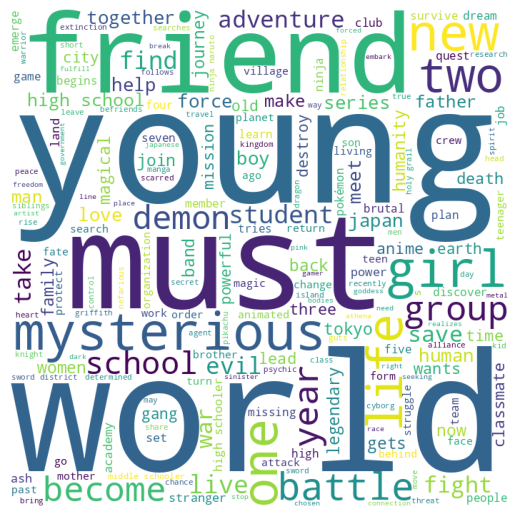

In [138]:
# Wordcloud for cluster 
hierarchical_worldcloud(6)

In [139]:
df[df['hierarchical_cluster'] == 7][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]
     

type                        title       director  \
27      Movie                       #Alive         Cho Il   
51    TV Show           100 Days My Prince        Unknown   
61    TV Show             12 Years Promise        Unknown   
91      Movie                     26 Years  Geun-hyun Cho   
95    TV Show                     28 Moons        Unknown   
...       ...                          ...            ...   
7551    Movie    What Happened to Mr. Cha?   Kim Dong-kyu   
7555  TV Show  What in the World Happened?        Unknown   
7583  TV Show     When the Camellia Blooms        Unknown   
7601  TV Show                 White Nights        Unknown   
7711  TV Show    YG Future Strategy Office        Unknown   

                                                   cast      country  \
27                             Yoo Ah-in, Park Shin-hye  South Korea   
51    Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...  South Korea   
61    So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...  South Korea   
91    Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...  South Korea   
95    Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Ge...  South Korea   
...                                                 ...          ...   
7551           Cha In-pyo, Cho Dal-hwan, Song Jae-ryong  South Korea   
7555  Eun-mi Go, Jaehyo, Eun-Hyung Jo, Ha-yeon Kim, ...  South Korea   
7583  Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...  South Korea   
7601  Yo-Won Lee, Goo Jin, U-ie, Hae-in Jung, Gook-h...  South Korea   
7711  Seungri, Yoo Byung Jae, Lee Jai-jin, Jinu, Son...  South Korea   

          rating               listed_in  \
27        Adults           Horror Movies   
51         Teens  International TV Shows   
61         Teens  International TV Shows   
91        Adults                  Dramas   
95    Older Kids  International TV Shows   
...          ...                     ...   
7551      Adults                Comedies   
7555       Teens  International TV Shows   
7583       Teens  International TV Shows   
7601       Teens  International TV Shows   
7711      Adults  International TV Shows   

                                            description  
27    As a grisly virus rampages a city, a lone man ...  
51    Upon losing his memory, a crown prince encount...  
61    A pregnant teen is forced by her family to lea...  
91    Twenty-six years after the 1980 massacre at Gw...  
95    When her fiancé acts strangely upon receiving ...  
...                                                 ...  
7551  With the peak of his career long behind him, a...  
7555  A happy secret romance between a 40-year-old w...  
7583  Dongbaek is a single mother. When a potential ...  
7601  A coldhearted heiress, a man from her past and...  
7711  K-pop star Seungri, BIGBANG's youngest member,...  

[170 rows x 8 columns]

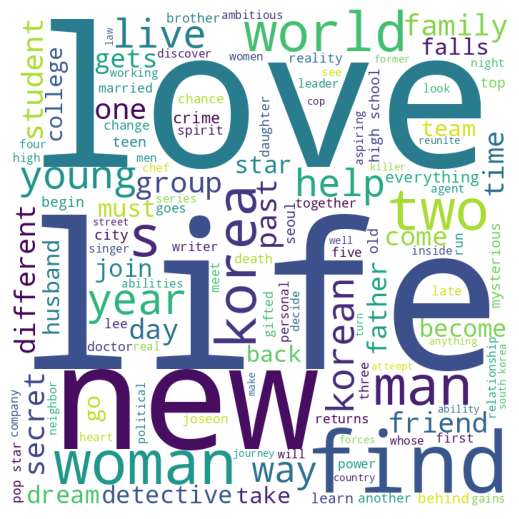

In [140]:
# Wordcloud for cluster 
hierarchical_worldcloud(7)

In [141]:
df[df['hierarchical_cluster'] == 8][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                                    title               director  \
13      Movie                                    2,215    Nottapon Boonprakob   
30      Movie                         #cats_the_mewvie       Michael Margolis   
35      Movie                                #Rucker50  Robert McCullough Jr.   
36      Movie                                  #Selfie         Cristina Jacob   
37      Movie                               #Selfie 69         Cristina Jacob   
...       ...                                      ...                    ...   
7686    Movie                   XV: Beyond the Tryline       Pierre Deschamps   
7717  TV Show                                      YOM                Unknown   
7784    Movie                        Zulu Man in Japan                Unknown   
7785  TV Show                    Zumbo's Just Desserts                Unknown   
7786    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS               Sam Dunn   

                                                   cast         country  \
13                                   Artiwara Kongmalai        Thailand   
30                                              Unknown          Canada   
35                                              Unknown   United States   
36    Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...         Romania   
37    Maia Morgenstern, Olimpia Melinte, Crina Semci...         Romania   
...                                                 ...             ...   
7686                                            Unknown  United Kingdom   
7717  Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...             nan   
7784                                            Nasty C             nan   
7785                         Adriano Zumbo, Rachel Khoo       Australia   
7786                                            Unknown  United Kingdom   

          rating               listed_in  \
13        Adults           Documentaries   
30         Teens           Documentaries   
35    Older Kids           Documentaries   
36        Adults                Comedies   
37        Adults                Comedies   
...          ...                     ...   
7686       Teens           Documentaries   
7717  Older Kids                Kids' TV   
7784      Adults           Documentaries   
7785  Older Kids  International TV Shows   
7786      Adults           Documentaries   

                                            description  
13    This intimate documentary follows rock star Ar...  
30    This pawesome documentary explores how our fel...  
35    This documentary celebrates the 50th anniversa...  
36    Two days before their final exams, three teen ...  
37    After a painful breakup, a trio of party-lovin...  
...                                                 ...  
7686  Set against the 2015 Rugby World Cup, this doc...  
7717  With the mind of a human being, and the body o...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...  

[870 rows x 8 columns]

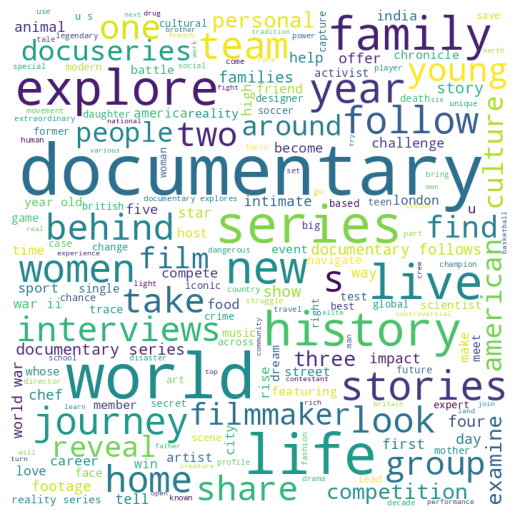

In [142]:
# Wordcloud for cluster 
hierarchical_worldcloud(8)

# **8 -Content Based Recommendation System**
Content-based recommendation systems recommend items to a user by using the similarity of items. This recommender system recommends products or items based on their description or features. It identifies the similarity between the products based on their descriptions.

It short notes which items a particular user likes and also the items that the users with behavior and likings like him/her likes, to recommend items to that user.

We can build a simple content based recommender system based on the similarity of the movie/shows.

If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.

To get the similarity score of the shows, we can use cosine similarity.

The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value. We can simply say that the cosine similarity score of two vectors increases as the angle between them decreases.

In [144]:
# veryfying index
df[['show_id', 'title', 'description']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7782   s7783                                     Zozo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...                                                 ...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...  

[7777 rows x 3 columns]

As you can see above dataframe there are total 7777 rows present in our dataframe and it show last index as 7786 because of dropping some of the rows while treating null values.

In order to build content based recommendation system we find out similarity score on the basis of specific index_id with respect to that specific "description" column.

If we can't reset the index there is highly chances that we calculate cosine similarity for another one index instead of that we provide index. In order to avoid this problem and address index properly while building recommandation system. We simply reset the index.

In [145]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly 
recommender_df[['show_id', 'title', 'description']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7772   s7783                                     Zozo   
7773   s7784                                   Zubaan   
7774   s7785                        Zulu Man in Japan   
7775   s7786                    Zumbo's Just Desserts   
7776   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...                                                 ...  
7772  When Lebanon's Civil War deprives Zozo of his ...  
7773  A scrappy but poor boy worms his way into a ty...  
7774  In this documentary, South African rapper Nast...  
7775  Dessert wizard Adriano Zumbo looks for the nex...  
7776  This documentary delves into the mystique behi...  

[7777 rows x 3 columns]

* As you can see above dataframe We successfully reset the index. Now dataset is ready to build content based recommandation system.

In [146]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [147]:
print(f"before reset index id for movie 'Zero' : {df[df['title'] == 'Zero'].index[0]}")  # index[0] --> to locate index position
print(f"after reset index id for movie 'Zero': {recommender_df[recommender_df['title'] == 'Zero'].index[0]}")

before reset index id for movie 'Zero' : 7764
after reset index id for movie 'Zero': 7754


In [148]:
 #calling out transformed array independent features created from tags(cluster) column after performing PCA for dimenssionality reduction.
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [150]:
# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[1.        , 0.07138682, 0.0253055 , ..., 0.00370117, 0.01618049,
        0.00535757],
       [0.07138682, 1.        , 0.        , ..., 0.02488436, 0.        ,
        0.        ],
       [0.0253055 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00370117, 0.02488436, 0.        , ..., 1.        , 0.00383805,
        0.12074413],
       [0.01618049, 0.        , 0.        , ..., 0.00383805, 1.        ,
        0.03928849],
       [0.00535757, 0.        , 0.        , ..., 0.12074413, 0.03928849,
        1.        ]])

**Function for list down top 10 recommended movie on the basis of cosine similarity score.**

In [151]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [152]:
recommend('Naruto')

If you liked 'Naruto', you may also enjoy: 

Naruto Shippuden : Blood Prison
Naruto Shippûden the Movie: Bonds
Naruto Shippuden: The Movie
Naruto the Movie 2: Legend of the Stone of Gelel
Naruto the Movie 3: Guardians of the Crescent Moon Kingdom
Naruto Shippûden the Movie: The Will of Fire
Naruto Shippuden: The Movie: The Lost Tower
Dragon's Dogma
Code Geass: Lelouch of the Rebellion
Marvel Anime: Wolverine


In [153]:
recommend('Our Planet')

If you liked 'Our Planet', you may also enjoy: 

Nature's Great Events: Diaries
Frozen Planet: On Thin Ice
Nature: Raising the Dinosaur Giant
Life Story
Trial By Media
Nature's Great Events (2009)
Nuestra Lucha Libre
Planet Earth II
Nature's Weirdest Events
The Blue Planet: A Natural History of the Oceans


In [154]:
recommend('Phir Hera Pheri')

If you liked 'Phir Hera Pheri', you may also enjoy: 

Bhool Bhulaiyaa
Thank You
Darr Sabko Lagta Hai
Golmaal: Fun Unlimited
Bhagam Bhag
Chup Chup Ke
Ready
Life Ki Toh Lag Gayi
Khushi
Welcome


In [155]:
# Recommendations for 'Peaky Blinders'
recommend('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy: 

Inception
Rebellion
Jonathan Strange & Mr Norrell
Transcendence
The Frankenstein Chronicles
Thorne: Scaredy Cat
Free Fire
Backtrack
Caught on Camera
Happy Valley


# **Conclusion**

In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

The dataset contained about 7787 records, and 11 attributes.
the most content is added to Netflix from october to january

* Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies

kids tv is the top most TV show genre in netflix

* most of the movies have duration of between 50 to 150

* highest number of tv_shows consistig of single season

* Those movies that have a rating of NC-17 have the longest average duration.

* When it comes to movies having a TV-Y rating, they have the shortest runtime on average

* unitated states has the highest number of content on the netflix ,followed by india

* india has highest number of movies in netflix

* 30% movies released on Netflix.

70% movies added on Netflix were released earlier by different mode.
* We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially.

* Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

* It was decided to cluster the data based on the attributes: director, cast, country, genre, and description.

* The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.Through TFIDF Vectorization, we created a total of 20000 attributes.We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.

* firstly built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.

* Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

* A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.
* In conclusion, Netflix clustering using machine learning algorithms such as k-means and agglomerative hierarchy analysis can provide valuable insights into user behavior and preferences. By grouping users into clusters based on their viewing habits and ratings, Netflix can better understand their customers and provide personalized recommendations.

* K-means clustering is a simple and efficient algorithm that can quickly group users into clusters based on their similarity. However, it requires specifying the number of clusters beforehand, which can be challenging. Agglomerative hierarchy analysis, on the other hand, does not require specifying the number of clusters beforehand and can create a hierarchy of clusters that provides additional insights into user behavior.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***